# Project name: Stress level in students

Develop an artifact to predict stress levels on higher education students using Machine Learning.

This project aims to be used to help and improve educational institutions. With the results and 
findings of this research, colleges and universities can be favored and guided into developing changes 
in the design of the academic curriculum, planning of assignment submissions deadlines, final exam dates 
organization, and many other factors that can affect mental health in students.

### Features description


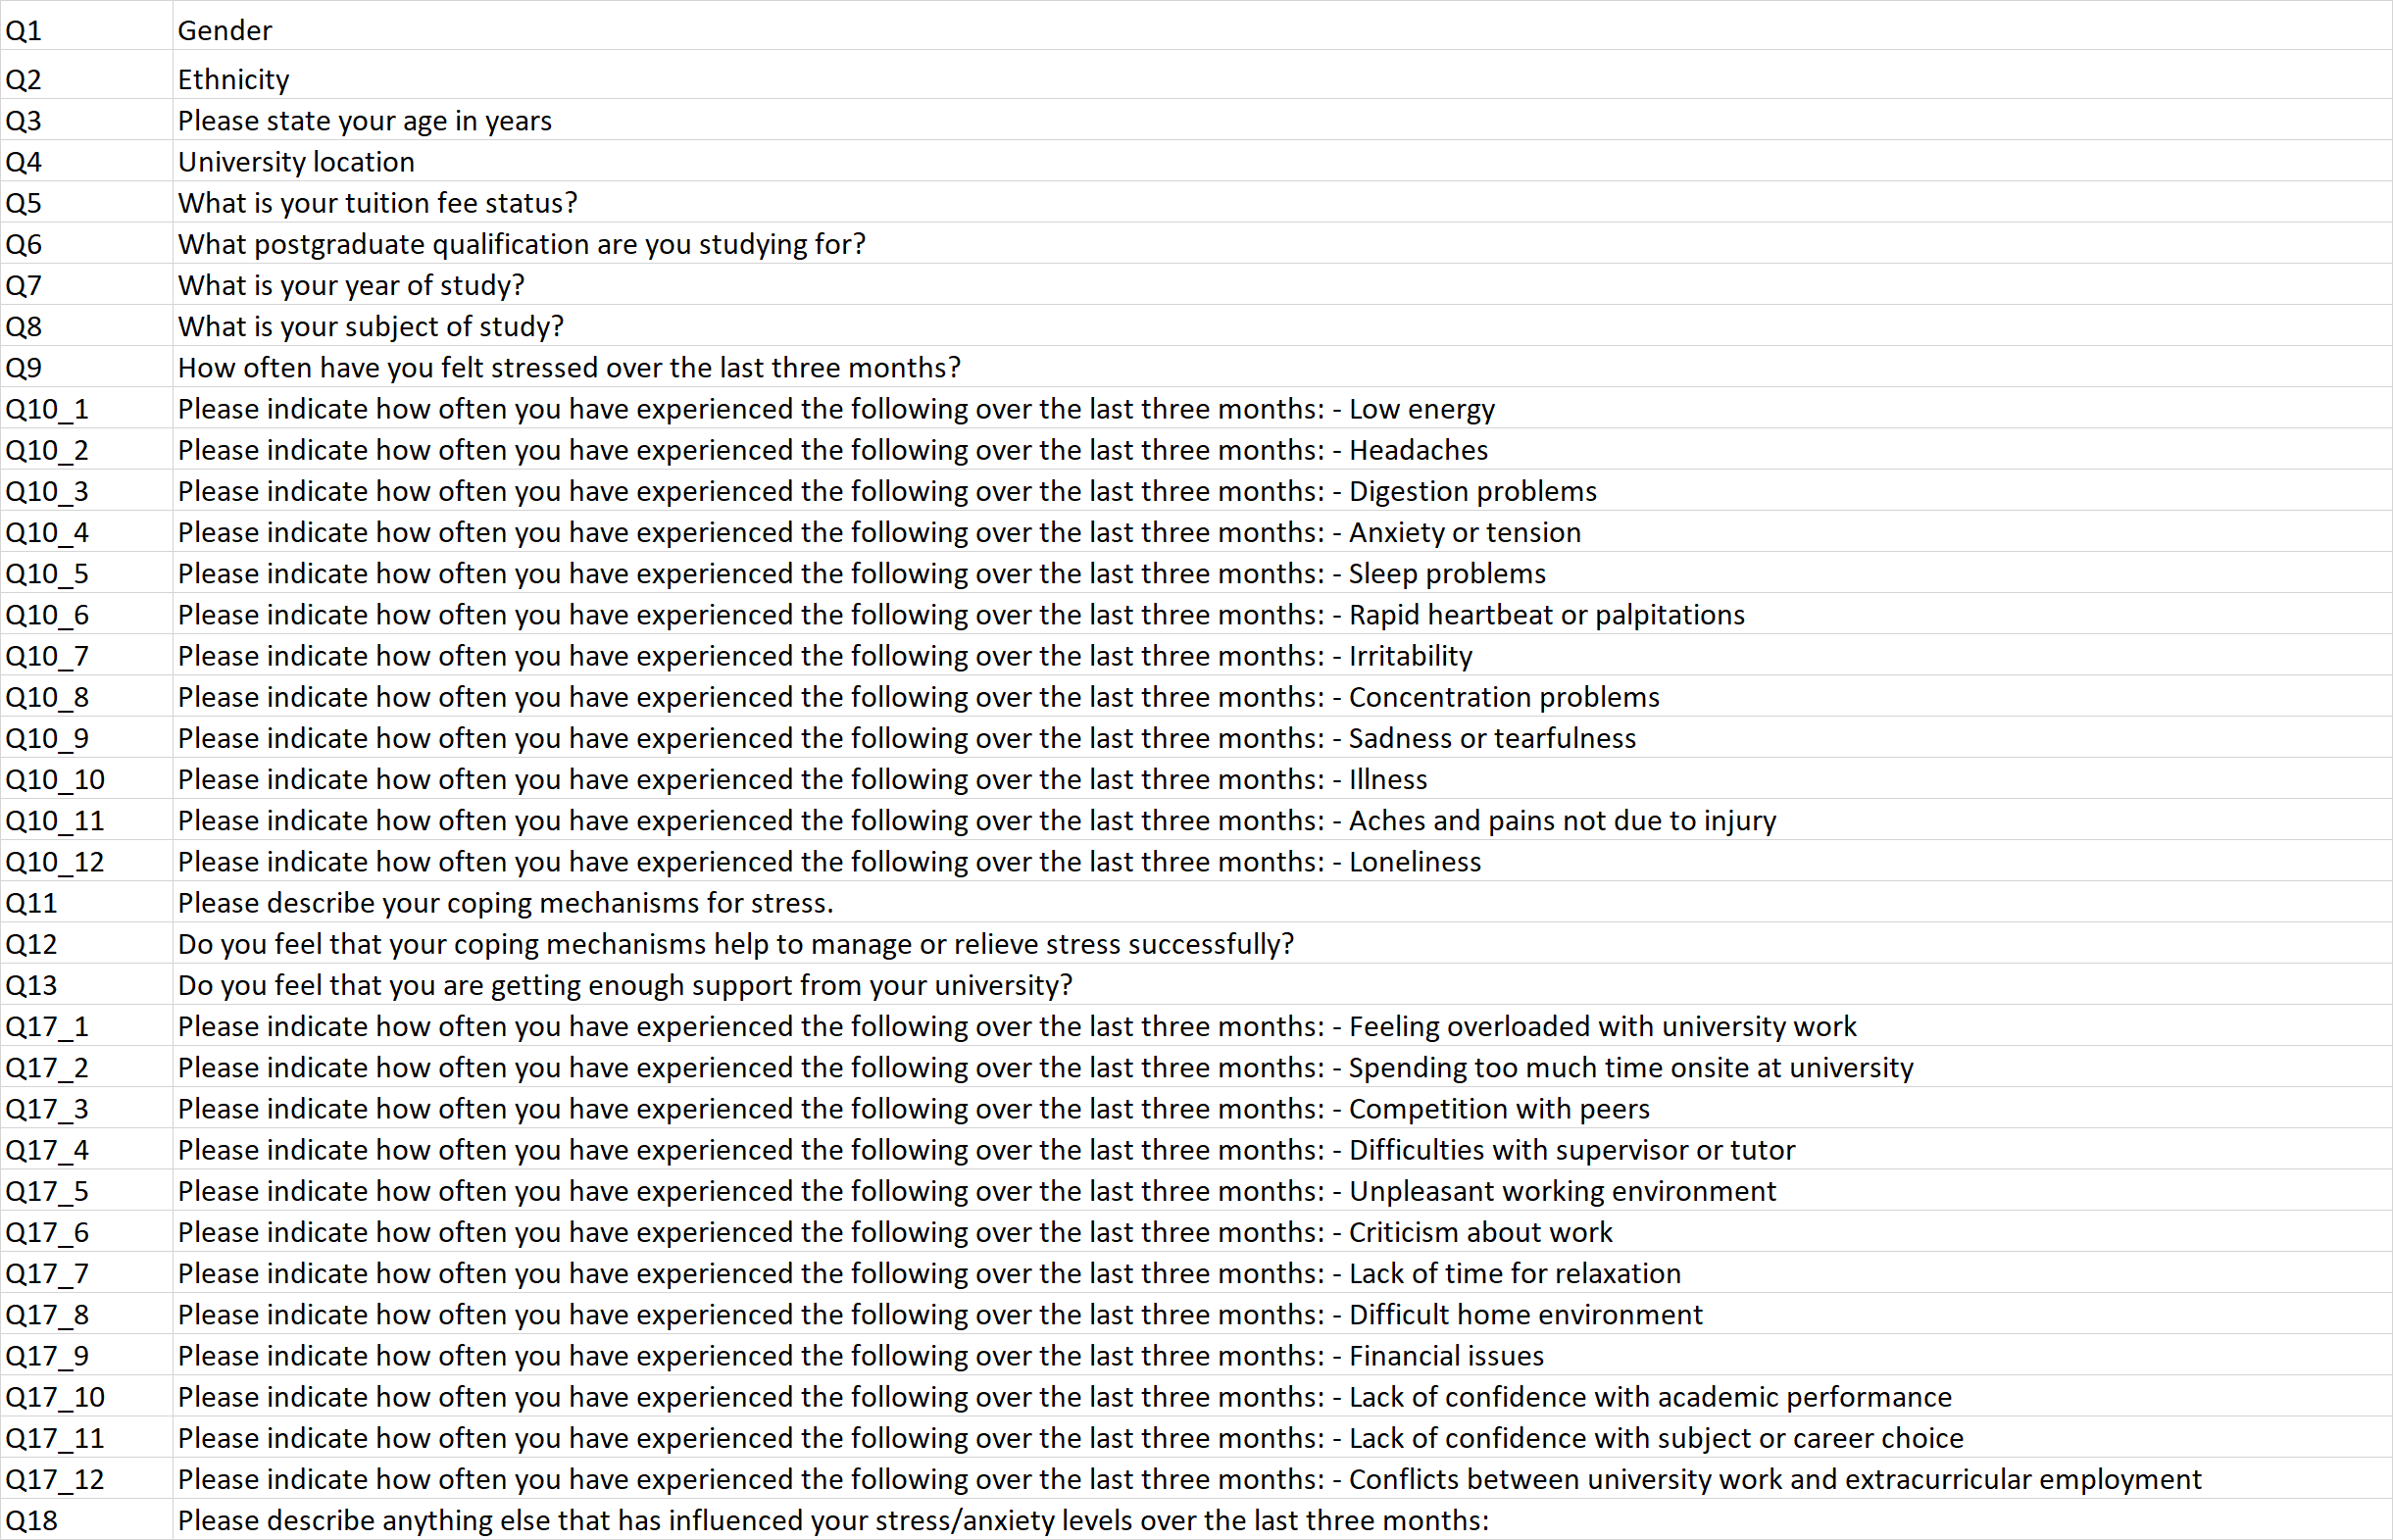

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U seaborn

Requirement already up-to-date: seaborn in c:\users\axk_l\anaconda3\lib\site-packages (0.11.2)
Note: you may need to restart the kernel to use updated packages.


In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import seaborn as seabornInstance
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint


Load dataset from URL

In [183]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Dani-elaqh/PiRates.Stress/main/dataset.csv')

## EDA (Exploratory Data Analysis)

Start explore the data

First step check how many observations and features has the data

In [184]:
print(dataset.shape)

(218, 36)


Let's take a look at 10 samples observations

In [185]:
dataset.sample(10)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q18
43,Female,Other,31,International,PhD,1,Social sciences,To a large extent,Fairly often,Sometimes,...,Sometimes,Almost never,Sometimes,Sometimes,Almost never,Fairly often,Very often,Very often,Almost never,Wanting to have a social life meanwhile doing ...
79,Female,White,24,International,PhD,3,Psychology,Completely,Fairly often,Sometimes,...,Fairly often,Never,Very often,Very often,Almost never,Sometimes,Very often,Fairly often,Sometimes,Long distance relationships and friends with t...
56,Female,White,29,UK,PhD,1,Life sciences,To a large extent,Fairly often,Sometimes,...,Sometimes,Almost never,Almost never,Fairly often,Fairly often,Almost never,Very often,Fairly often,Never,Breakdown of long-term relationship
38,Female,White,26,EU,PhD,2,Psychology,To a large extent,Fairly often,Fairly often,...,Never,Never,Never,Fairly often,Never,Never,Almost never,Fairly often,Fairly often,NaN
144,Female,White,48,UK,PhD,4,Arts and humanities,To a large extent,Fairly often,Almost never,...,Almost never,Never,Never,Very often,Almost never,Never,Fairly often,Almost never,Very often,"As a mature student I have a young child, a pa..."
40,Female,Asian / Asian British,25,UK,PhD,2,Life sciences,To a large extent,Very often,Fairly often,...,Almost never,Almost never,Sometimes,Fairly often,Sometimes,Sometimes,Fairly often,Sometimes,Almost never,Time of the month makes me more stressed
175,Male,White,25,UK,Taught master's degree,1,Psychology,Somewhat,Fairly often,Fairly often,...,Never,Never,Almost never,Sometimes,Never,Almost never,Almost never,Sometimes,Sometimes,N/a
121,Female,Mixed / Multiple Ethnic Groups,30,UK,PhD,1,Law,To a large extent,Sometimes,Sometimes,...,Almost never,Sometimes,Almost never,Almost never,Almost never,Almost never,Almost never,Never,Never,balancing uni work and extra curricula activities
176,Male,White,22,UK,Research master's degree,1,Arts and humanities,To a large extent,Sometimes,Almost never,...,Very often,Never,Sometimes,Almost never,Almost never,Never,Fairly often,Fairly often,Never,Having to completely restart my research maste...
196,Male,White,29,UK,Taught master's degree,1,Physical science,Somewhat,Sometimes,Sometimes,...,Never,Almost never,Almost never,Sometimes,Almost never,Sometimes,Almost never,Almost never,Almost never,family illness


### Type of data (Numerical or Categorical?)

Identify which features are numerical and which are categorical

In [186]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      218 non-null    object
 1   Q2      218 non-null    object
 2   Q3      218 non-null    int64 
 3   Q5      218 non-null    object
 4   Q6      218 non-null    object
 5   Q7      218 non-null    object
 6   Q8      218 non-null    object
 7   Q9      218 non-null    object
 8   Q10_1   218 non-null    object
 9   Q10_2   218 non-null    object
 10  Q10_3   218 non-null    object
 11  Q10_4   218 non-null    object
 12  Q10_5   218 non-null    object
 13  Q10_6   218 non-null    object
 14  Q10_7   218 non-null    object
 15  Q10_8   218 non-null    object
 16  Q10_9   218 non-null    object
 17  Q10_10  218 non-null    object
 18  Q10_11  218 non-null    object
 19  Q10_12  218 non-null    object
 20  Q11     218 non-null    object
 21  Q12     218 non-null    object
 22  Q13     218 non-null    ob

**Note** that only one feature (Q3 = Age) has numerical values

### Missing Values

In [187]:
# NaN occurrences in Columns

print(dataset.isnull().sum(axis = 0))

Q1         0
Q2         0
Q3         0
Q5         0
Q6         0
Q7         0
Q8         0
Q9         0
Q10_1      0
Q10_2      0
Q10_3      0
Q10_4      0
Q10_5      0
Q10_6      0
Q10_7      0
Q10_8      0
Q10_9      0
Q10_10     0
Q10_11     0
Q10_12     0
Q11        0
Q12        0
Q13        0
Q17_1      0
Q17_2      0
Q17_3      0
Q17_4      0
Q17_5      0
Q17_6      0
Q17_7      0
Q17_8      0
Q17_9      0
Q17_10     0
Q17_11     0
Q17_12     0
Q18       74
dtype: int64


**There are 74 missing values in column Q18**

## Drop Features

create a copy of the dataset and drop features Q11, Q18 in the new dataset, because the information is irrelevant for the data analysis

In [188]:
dataset_1 = dataset.copy()

In [189]:
dataset_1.drop(columns =['Q11', 'Q18'], inplace = True)

In [190]:
dataset_1.sample(5)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12
41,Female,White,26,UK,Research master's degree,1,"Clinical, pre-clinical and health",Somewhat,Sometimes,Sometimes,...,Almost never,Almost never,Almost never,Sometimes,Fairly often,Never,Sometimes,Sometimes,Sometimes,Sometimes
149,Female,White,25,UK,PhD,1,Life sciences,To a large extent,Fairly often,Never,...,Very often,Never,Sometimes,Sometimes,Sometimes,Fairly often,Almost never,Very often,Fairly often,Sometimes
178,Male,White,28,UK,PhD,2,Arts and humanities,Somewhat,Sometimes,Almost never,...,Almost never,Never,Never,Never,Almost never,Never,Fairly often,Sometimes,Sometimes,Almost never
101,Female,White,22,UK,Taught master's degree,1,"Clinical, pre-clinical and health",Somewhat,Fairly often,Sometimes,...,Fairly often,Sometimes,Sometimes,Almost never,Sometimes,Fairly often,Fairly often,Fairly often,Fairly often,Sometimes
39,Female,White,32,UK,PhD,2,Life sciences,To a large extent,Fairly often,Almost never,...,Almost never,Very often,Fairly often,Sometimes,Fairly often,Almost never,Never,Fairly often,Almost never,Never


In [191]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      218 non-null    object
 1   Q2      218 non-null    object
 2   Q3      218 non-null    int64 
 3   Q5      218 non-null    object
 4   Q6      218 non-null    object
 5   Q7      218 non-null    object
 6   Q8      218 non-null    object
 7   Q9      218 non-null    object
 8   Q10_1   218 non-null    object
 9   Q10_2   218 non-null    object
 10  Q10_3   218 non-null    object
 11  Q10_4   218 non-null    object
 12  Q10_5   218 non-null    object
 13  Q10_6   218 non-null    object
 14  Q10_7   218 non-null    object
 15  Q10_8   218 non-null    object
 16  Q10_9   218 non-null    object
 17  Q10_10  218 non-null    object
 18  Q10_11  218 non-null    object
 19  Q10_12  218 non-null    object
 20  Q12     218 non-null    object
 21  Q13     218 non-null    object
 22  Q17_1   218 non-null    ob

### Statistics of the features

In [192]:
dataset_1.describe()

,Q3
count,218.000000
mean,36.550459
std,132.862771
min,21.000000
25%,24.000000
50%,26.000000
75%,29.000000
max,1987.000000


To observe the distribution of numerical data the visualization is a histogram

C:\Users\axk_l\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



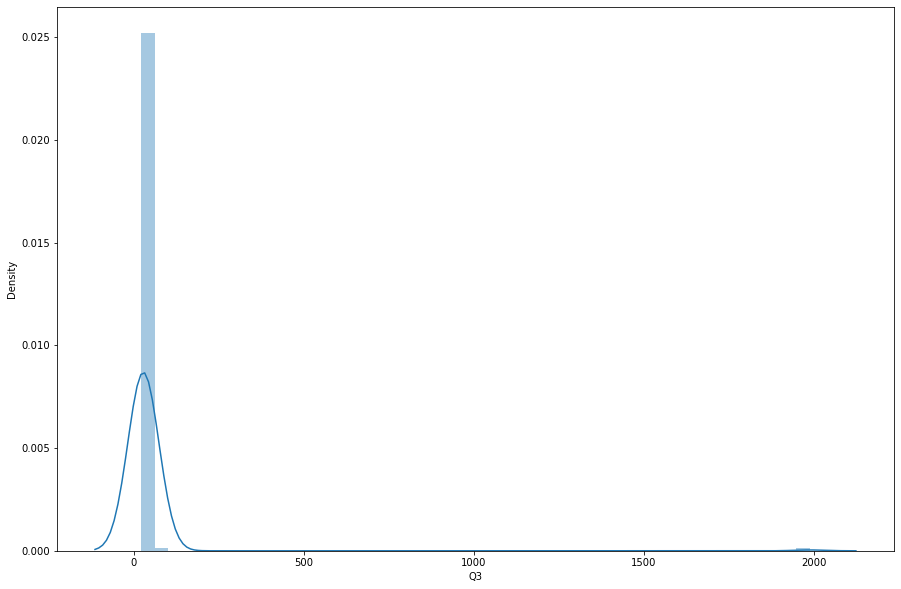

In [193]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset_1['Q3'])

With Distplot is easier to provide an approach to visualize the univariate or bivariate distribution of data. The graph above talks about the skewness of the data and the outliers

### Outliers

Showing the outliers in question 3 in the dataset, the only numerical data type at the moment

<Figure size 1080x720 with 0 Axes>

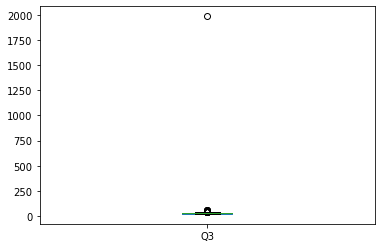

In [194]:
plt.figure(figsize=(15,10))
dataset_1.plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
plt.show()

With this second graph a there is a better view to the outliers in the Question 3

Text(0.5, 1.0, 'Year of study (Q7) vs age (Q3) by gender')

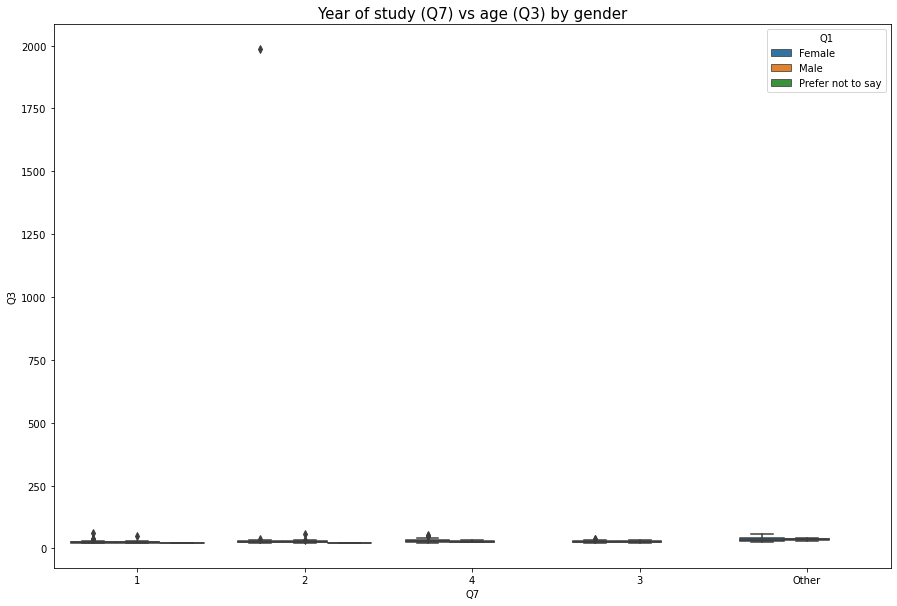

In [195]:
#BOX PLOT
plt.figure(figsize=(15,10))
sns.boxplot(x='Q7', y='Q3', data=dataset, hue='Q1')
plt.title('Year of study (Q7) vs age (Q3) by gender', fontsize=15)

### Fixing outliers

In [196]:
dataset_1['Q3'].value_counts()

26      32
24      29
25      27
22      24
29      20
23      15
27      12
28      11
30       7
31       7
36       4
34       3
33       3
32       3
21       3
35       3
39       3
43       2
48       2
63       1
38       1
40       1
50       1
53       1
56       1
58       1
1987     1
Name: Q3, dtype: int64

It was identified that the outlier is in relation to the fact that they put the year of birth and not the age, this data has to be replaced with the correct age

In [197]:
dataset_1['Q3'] = dataset_1['Q3'].replace(1987, 33)

<Figure size 1440x1080 with 0 Axes>

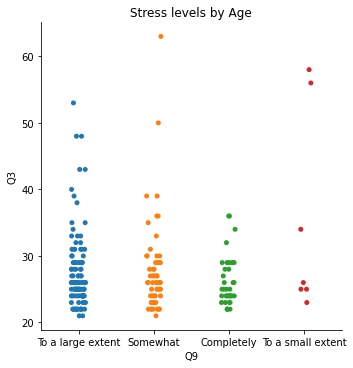

In [198]:
plt.figure(figsize=(20,15))
sns.catplot(x="Q9", y="Q3", data=dataset_1)
plt.title("Stress levels by Age")
plt.show()

This graph is the stress levels by the age of the participants, now that the outlier was replaced the visualization is easily understandable. The groups of ages between 20 and 35 are the majority of the participants and the ones who felt more stress during the academic year. 

In [199]:
fig = px.bar(dataset_1, x="Q9", y="Q3", color="Q2",
             pattern_shape="Q2", pattern_shape_sequence=[".", "x", "+"])
fig.update_layout(title_text="Stress levels by age and ethnicity")
fig.show()

This viualization states that the majority of the participants in the survey were white, and regaardless of the race the levels of stress are high.

In [200]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      218 non-null    object
 1   Q2      218 non-null    object
 2   Q3      218 non-null    int64 
 3   Q5      218 non-null    object
 4   Q6      218 non-null    object
 5   Q7      218 non-null    object
 6   Q8      218 non-null    object
 7   Q9      218 non-null    object
 8   Q10_1   218 non-null    object
 9   Q10_2   218 non-null    object
 10  Q10_3   218 non-null    object
 11  Q10_4   218 non-null    object
 12  Q10_5   218 non-null    object
 13  Q10_6   218 non-null    object
 14  Q10_7   218 non-null    object
 15  Q10_8   218 non-null    object
 16  Q10_9   218 non-null    object
 17  Q10_10  218 non-null    object
 18  Q10_11  218 non-null    object
 19  Q10_12  218 non-null    object
 20  Q12     218 non-null    object
 21  Q13     218 non-null    object
 22  Q17_1   218 non-null    ob

**35 out of 36 features are objects, all columns must be evaluated and replaced by numerical data, to have a better approach to train the models.**

In [201]:
##dataset_1['Q3'] = dataset_1['Q3'].replace(1987, dataset_1['Q3'].mode()[0])

In [202]:
dataset_1['Q1'].value_counts()

Female               161
Male                  55
Prefer not to say      2
Name: Q1, dtype: int64

In [203]:
dataset_1['Q1'].unique()

array(['Female', 'Male', 'Prefer not to say'], dtype=object)

In [204]:
##dataset_1['Q1'].map({'Female':1, 'Male':2, 'Prefer not to say':3})

In [205]:
dataset_1['Q1'].replace(('Female', 'Male', 'Prefer not to say'),(1, 2, 3), inplace = True)

In [206]:
dataset_1.sample(5)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12
38,1,White,26,EU,PhD,2,Psychology,To a large extent,Fairly often,Fairly often,...,Never,Never,Never,Never,Fairly often,Never,Never,Almost never,Fairly often,Fairly often
190,2,White,50,International,PhD,1,Arts and humanities,Somewhat,Sometimes,Almost never,...,Sometimes,Almost never,Almost never,Almost never,Almost never,Sometimes,Sometimes,Fairly often,Almost never,Almost never
206,2,White,26,UK,PhD,3,Arts and humanities,To a small extent,Fairly often,Sometimes,...,Sometimes,Sometimes,Almost never,Sometimes,Sometimes,Never,Sometimes,Sometimes,Never,Almost never
197,2,White,23,UK,PhD,1,Life sciences,Completely,Fairly often,Fairly often,...,Sometimes,Almost never,Never,Very often,Fairly often,Almost never,Sometimes,Sometimes,Never,Never
39,1,White,32,UK,PhD,2,Life sciences,To a large extent,Fairly often,Almost never,...,Almost never,Very often,Fairly often,Sometimes,Fairly often,Almost never,Never,Fairly often,Almost never,Never


In [207]:
dataset_1['Q2'].value_counts()

White                                          174
Mixed / Multiple Ethnic Groups                  15
Asian / Asian British                           14
Other                                           11
Black / African / Caribbean / Black British      4
Name: Q2, dtype: int64

In [208]:
dataset_1['Q2'].unique()

array(['White', 'Mixed / Multiple Ethnic Groups', 'Asian / Asian British',
       'Other', 'Black / African / Caribbean / Black British'],
      dtype=object)

In [209]:
dataset_1['Q2'].replace(('White', 'Mixed / Multiple Ethnic Groups', 'Asian / Asian British','Other', 
                         'Black / African / Caribbean / Black British'),(1, 2, 3, 4, 5), inplace = True)

In [210]:
dataset_1['Q3'].value_counts()

26    32
24    29
25    27
22    24
29    20
23    15
27    12
28    11
30     7
31     7
33     4
36     4
32     3
21     3
34     3
35     3
39     3
43     2
48     2
58     1
38     1
40     1
50     1
53     1
56     1
63     1
Name: Q3, dtype: int64

### Group ages into ranges

The feature Q3 (Age) will have to be classified by ranges so it will not have as many values that can cause noise in the data analysis.

In [211]:
bins = [0, 20, 25, 30, 35, 40, 65]

In [212]:
names = [1, 2, 3, 4, 5, 6]

In [213]:
dataset_1['Q3'] = pd.cut(dataset_1['Q3'], bins, labels = names)

In [214]:
dataset_1['Q3'].replace((1, 2, 3, 4, 5, 6),(1, 2, 3, 4, 5, 6), inplace = True)

C:\Users\axk_l\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



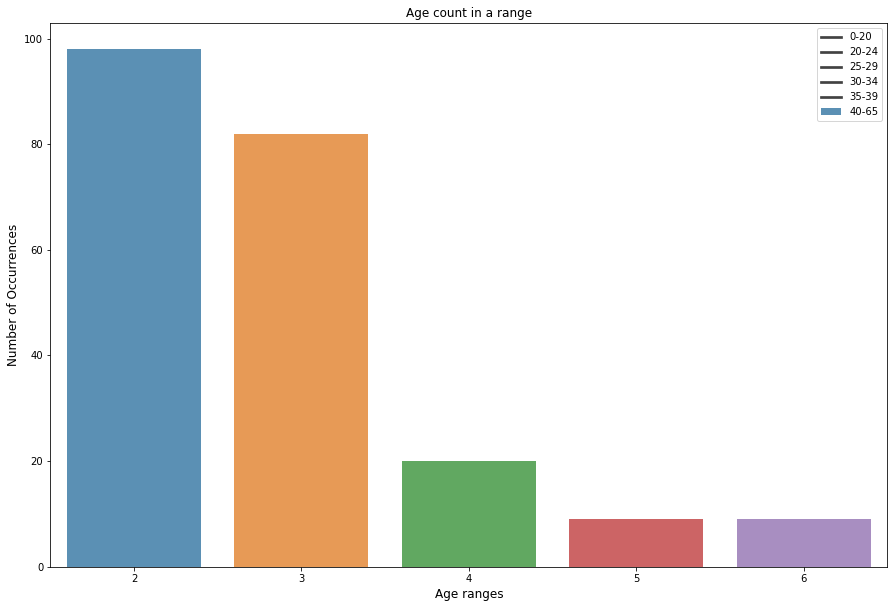

In [215]:
age_count  = dataset_1["Q3"].value_counts()
age_count = age_count[:10,]
plt.figure(figsize=(15,10))
sns.barplot(age_count.index, age_count.values, alpha=0.8)
plt.title('Age count in a range')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Age ranges', fontsize=12)
plt.legend(['0-20', '20-24', '25-29', '30-34', '35-39', '40-65'])
plt.show()

Counting the values with the age ranges is possible to confirm that the majority of students in this study group are between 20 and 24.

**Convert Q3 (Age) Categorical data to Integer**

In [216]:
dataset_1.iloc[:, 2 ] = dataset_1.iloc[:, 2 ].astype(float).astype(int)

In [217]:
dataset_1['Q3'].value_counts()

2    98
3    82
4    20
6     9
5     9
Name: Q3, dtype: int64

### Converting the categorical feature into numerical

In [218]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      218 non-null    int64 
 1   Q2      218 non-null    int64 
 2   Q3      218 non-null    int32 
 3   Q5      218 non-null    object
 4   Q6      218 non-null    object
 5   Q7      218 non-null    object
 6   Q8      218 non-null    object
 7   Q9      218 non-null    object
 8   Q10_1   218 non-null    object
 9   Q10_2   218 non-null    object
 10  Q10_3   218 non-null    object
 11  Q10_4   218 non-null    object
 12  Q10_5   218 non-null    object
 13  Q10_6   218 non-null    object
 14  Q10_7   218 non-null    object
 15  Q10_8   218 non-null    object
 16  Q10_9   218 non-null    object
 17  Q10_10  218 non-null    object
 18  Q10_11  218 non-null    object
 19  Q10_12  218 non-null    object
 20  Q12     218 non-null    object
 21  Q13     218 non-null    object
 22  Q17_1   218 non-null    ob

In [219]:
dataset_1['Q5'].replace(('EU', 'International', 'UK'),(1, 2, 1), inplace = True)

In [220]:
dataset_1['Q5'].value_counts()

1    185
2     33
Name: Q5, dtype: int64

In [221]:
dataset_1['Q6'].replace(("Other", "PhD", "Research master's degree","Taught master's degree"),(0, 1, 2, 3), inplace = True)

In [222]:
dataset_1['Q6'].value_counts()

1    160
3     41
2     12
0      5
Name: Q6, dtype: int64

In [223]:
dataset_1['Q7'].replace(('1','2', '3','4','Other'),(1, 2, 3, 4, 1), inplace = True)

In [224]:
dataset_1['Q7'].value_counts()

1    108
2     44
3     38
4     28
Name: Q7, dtype: int64

Text(0.5, 1.0, 'Bar plot of students per Year of study')

<Figure size 1440x1080 with 0 Axes>

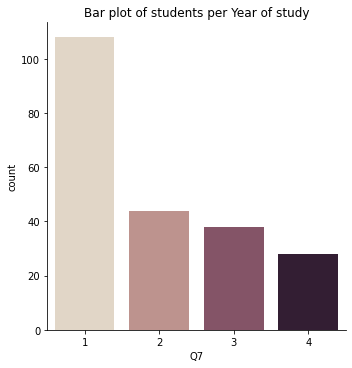

In [225]:
plt.figure(figsize=(20,15)) 
sns.catplot(x="Q7", kind="count", palette="ch:.25", data=dataset_1)
plt.title("Bar plot of students per Year of study")

The students that are a minority in thi survey are the ones in the range 40 and over and the group in the range 0 to 21 are ones who are the biggest participant in this survey.

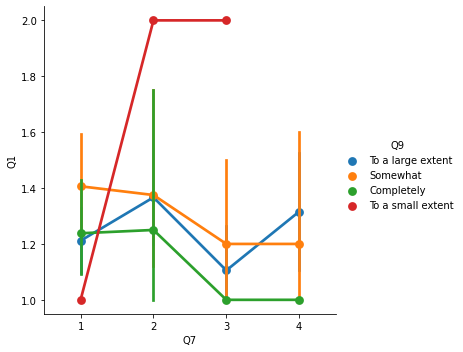

In [226]:
sns.catplot(x="Q7", y="Q1", hue="Q9", kind="point", data=dataset_1)

The Catplot is to see the relationship between the year of study and the stress levels. The students have different levesl of stress, accordign to the year of study, this could be because as the carrer is almost finish the number of classes diminish and also de load for the assisgments. 

In [227]:
dataset_1['Q8'].unique()

array(['Arts and humanities', 'Computer science', 'Life sciences',
       'Physical science', 'Social sciences',
       'Engineering and technology', 'Clinical, pre-clinical and health',
       'Education', 'Other', 'Law', 'Psychology'], dtype=object)

In [228]:
dataset_1['Q8'].replace(('Arts and humanities', 'Computer science', 'Life sciences',
       'Physical science', 'Social sciences',
       'Engineering and technology', 'Clinical, pre-clinical and health',
       'Education', 'Other', 'Law', 'Psychology'),(1, 3, 6, 8, 7, 3, 2, 4, 10, 5, 9), inplace = True)

In [229]:
dataset_1['Q8'].value_counts()

6     80
1     42
9     17
10    15
7     15
3     13
2     13
8     11
5      7
4      5
Name: Q8, dtype: int64

Text(0.5, 1.0, 'Subject of study and levels of stress according to gender')

<Figure size 1800x1080 with 0 Axes>

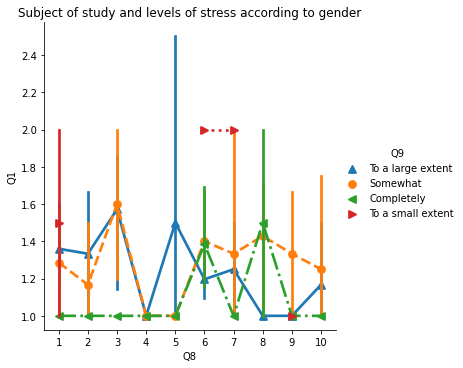

In [230]:
plt.figure(figsize = (25,15))
sns.catplot(x="Q8", y="Q1", hue="Q9",
            markers=["^", "o", "<", ">"], linestyles=["-", "--", "-.", ":"],
            kind="point", data=dataset_1)
plt.title("Subject of study and levels of stress according to gender")

This graph tells that the subject of law is the most stressful to a large extent. followed by Computer Science

In [231]:
dataset_1['Q9'].unique()

array(['To a large extent', 'Somewhat', 'Completely', 'To a small extent'],
      dtype=object)

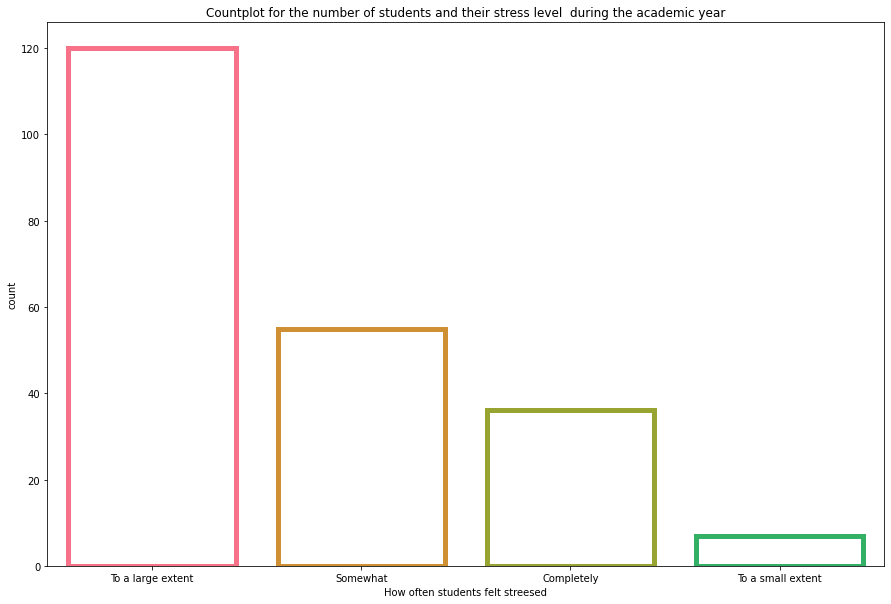

In [232]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="Q9", data=dataset_1,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("husl", 8)).set(xlabel='How often students felt streesed' ,title='Countplot for the number of students and their stress level  during the academic year')

The previous visulization state from the an early start that most of the students fell some kidn of stress.

In [233]:
dataset_1['Q9'].replace(('To a large extent', 'Somewhat', 'Completely', 'To a small extent', 'not at all'),
                        (4, 3, 5, 2, 1), inplace = True)

In [234]:
dataset_1['Q9'].value_counts()

4    120
3     55
5     36
2      7
Name: Q9, dtype: int64

In [235]:
dataset_1.sample(3)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12
47,1,1,3,1,1,2,1,4,Fairly often,Almost never,...,Sometimes,Almost never,Very often,Sometimes,Sometimes,Sometimes,Very often,Very often,Sometimes,Very often
83,1,1,2,1,1,1,7,4,Sometimes,Sometimes,...,Almost never,Sometimes,Almost never,Almost never,Sometimes,Sometimes,Sometimes,Almost never,Sometimes,Sometimes
180,2,1,3,1,1,1,3,4,Sometimes,Almost never,...,Fairly often,Almost never,Almost never,Fairly often,Fairly often,Sometimes,Fairly often,Very often,Very often,Never


In [236]:
dataset_1['Q10_1'].unique()

array(['Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'],
      dtype=object)

In [237]:
dataset_1['Q10_1'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),(3, 4, 1, 5, 2), 
                           inplace = True)

In [238]:
dataset_1['Q10_2'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),(3, 4, 1, 5, 2), 
                           inplace = True)

In [239]:
dataset_1['Q10_3'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),(3, 4, 1, 5, 2), 
                           inplace = True)

In [240]:
dataset_1['Q10_4'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),(3, 4, 1, 5, 2), 
                          inplace = True)

In [241]:
dataset_1['Q10_5'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [242]:
dataset_1['Q10_6'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [243]:
dataset_1['Q10_7'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [244]:
dataset_1['Q10_8'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [245]:
dataset_1['Q10_9'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [246]:
dataset_1['Q10_10'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [247]:
dataset_1['Q10_11'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [248]:
dataset_1['Q10_12'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [249]:
dataset_1['Q10_12'].value_counts()

3    72
2    53
4    38
1    36
5    19
Name: Q10_12, dtype: int64

In [250]:
dataset_1['Q12'].unique()

array(['Yes', 'Not sure', 'No'], dtype=object)

In [251]:
dataset_1['Q12'].replace(('Yes', 'Not sure', 'No'),(1, 3, 2), inplace = True)

In [252]:
dataset_1['Q12'].value_counts()

3    91
1    91
2    36
Name: Q12, dtype: int64

In [253]:
dataset_1['Q13'].unique()

array(['Yes', 'Not sure', 'No'], dtype=object)

In [254]:
dataset_1['Q13'].replace(('Yes', 'Not sure', 'No'),(1, 3, 2), inplace = True)

Text(0.5, 1.0, 'Difficulties between managing college and work')

<Figure size 1800x1080 with 0 Axes>

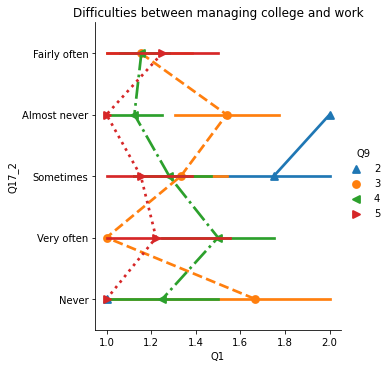

In [255]:
plt.figure(figsize = (25,15))
sns.catplot(x="Q1", y="Q17_2", hue="Q9",
            markers=["^", "o", "<", ">"], linestyles=["-", "--", "-.", ":"],
            kind="point", data=dataset_1)
plt.title("Difficulties between managing college and work")

The gender femenine and male are the onces who struggle the  most about handling colleg and work.

In [256]:
dataset_1['Q17_1'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_2'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_3'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_4'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_5'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_6'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_7'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_8'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_9'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_10'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_11'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_12'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)

### Verify all changes made to the dataset

**All features are numerical data**

In [257]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q1      218 non-null    int64
 1   Q2      218 non-null    int64
 2   Q3      218 non-null    int32
 3   Q5      218 non-null    int64
 4   Q6      218 non-null    int64
 5   Q7      218 non-null    int64
 6   Q8      218 non-null    int64
 7   Q9      218 non-null    int64
 8   Q10_1   218 non-null    int64
 9   Q10_2   218 non-null    int64
 10  Q10_3   218 non-null    int64
 11  Q10_4   218 non-null    int64
 12  Q10_5   218 non-null    int64
 13  Q10_6   218 non-null    int64
 14  Q10_7   218 non-null    int64
 15  Q10_8   218 non-null    int64
 16  Q10_9   218 non-null    int64
 17  Q10_10  218 non-null    int64
 18  Q10_11  218 non-null    int64
 19  Q10_12  218 non-null    int64
 20  Q12     218 non-null    int64
 21  Q13     218 non-null    int64
 22  Q17_1   218 non-null    int64
 23  Q17_2   218 non

In [258]:
dataset_1.sample(5)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12
116,1,1,2,1,1,3,6,4,4,4,...,2,4,1,2,2,3,3,4,3,1
175,2,1,2,1,3,1,9,3,4,4,...,3,1,1,2,3,1,2,2,3,3
109,1,4,3,2,1,3,4,5,4,3,...,1,3,3,2,5,3,5,4,3,2
36,1,1,2,1,2,1,6,4,4,2,...,1,1,3,1,5,5,5,4,5,5
196,2,1,3,1,3,1,8,3,3,3,...,2,1,2,2,3,2,3,2,2,2


**Statistics of the feature**

In [259]:
dataset_1.describe()

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,1.270642,1.422018,2.848624,1.151376,1.408257,1.935780,5.220183,3.848624,3.844037,2.995413,...,2.784404,2.344037,2.366972,2.399083,3.527523,2.288991,2.940367,3.880734,3.321101,2.366972
std,0.465551,0.948378,1.029529,0.359240,0.816492,1.088484,2.816534,0.724822,0.781990,1.013720,...,1.200743,1.146417,1.074725,1.021158,1.034731,1.204434,1.284837,1.035986,1.239747,1.424994
min,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.250000,3.000000,3.000000,2.000000,...,2.000000,1.000000,2.000000,2.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000
50%,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,6.000000,4.000000,4.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000
75%,2.000000,1.000000,3.000000,1.000000,1.000000,3.000000,7.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,5.000000,4.000000,3.750000
max,3.000000,5.000000,6.000000,2.000000,3.000000,4.000000,10.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### More Visualizations

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

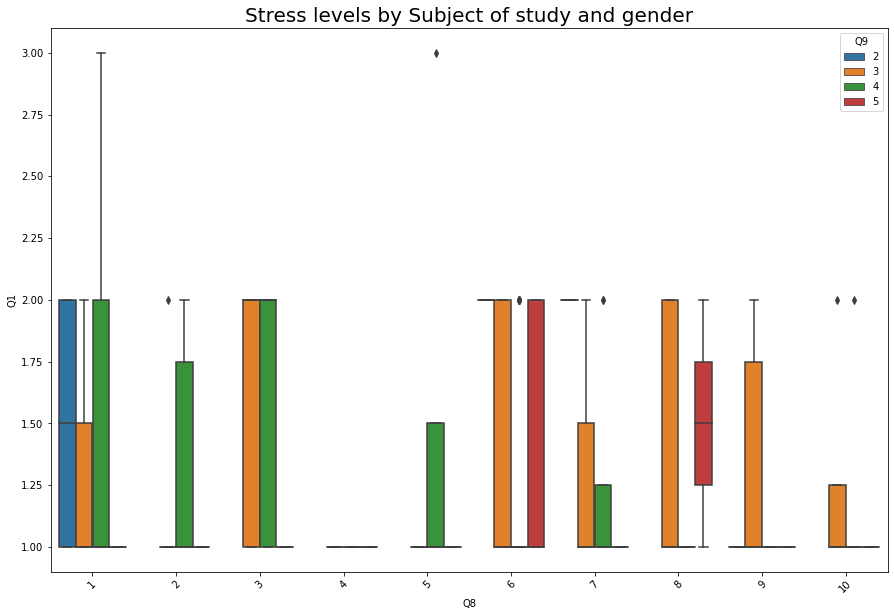

In [260]:
#BOX PLOT
plt.figure(figsize=(15,10))
sns.boxplot(x='Q8', y='Q1', data=dataset_1, hue='Q9')
plt.title('Stress levels by Subject of study and gender', fontsize=20)
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
plt.xticks(rotation=45)

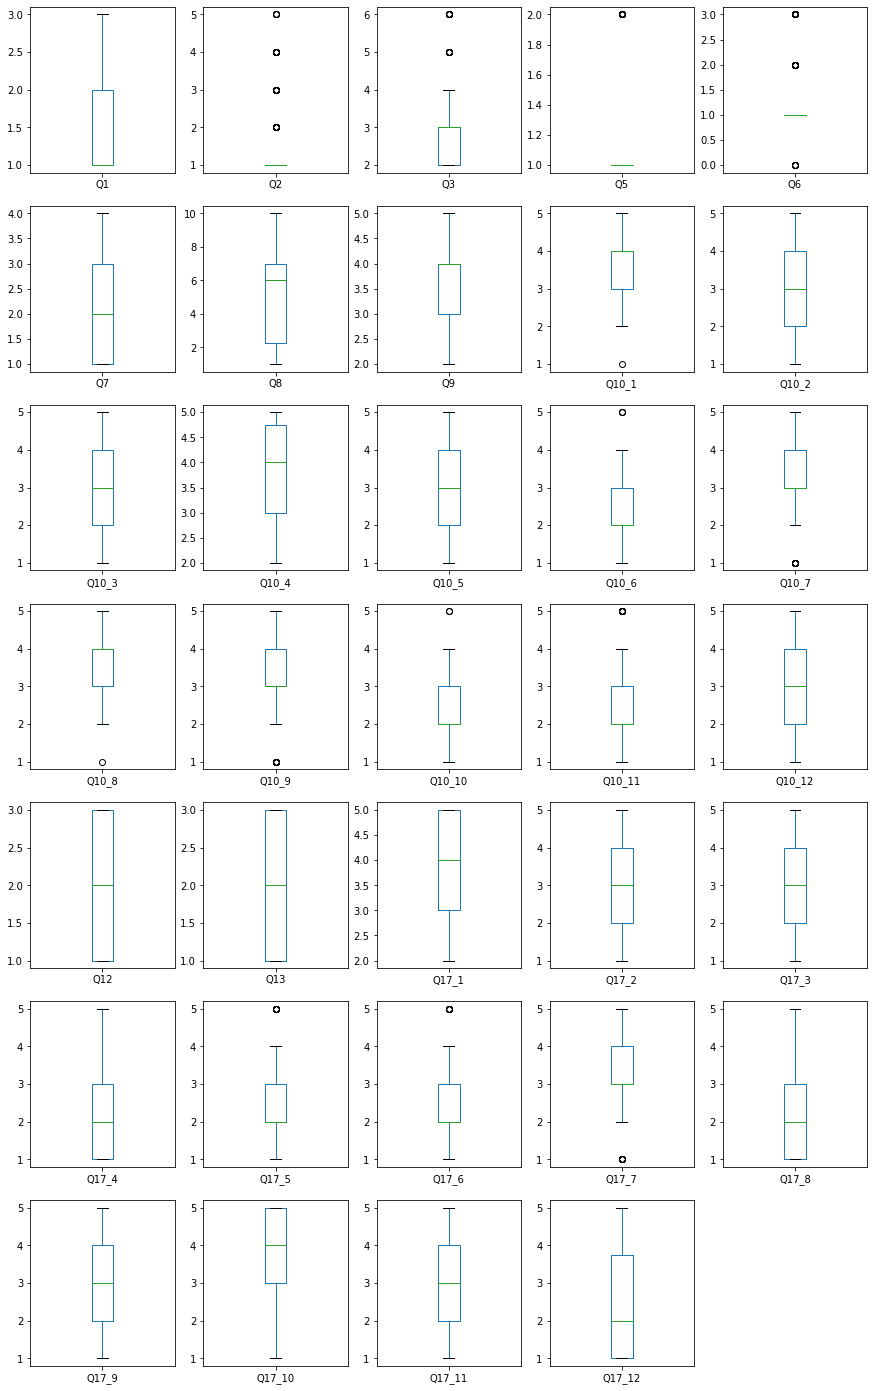

In [263]:
dataset_1.plot(kind='box', subplots=True, layout=(7,5), sharex=False, sharey=False, figsize=(15, 25))
plt.show()

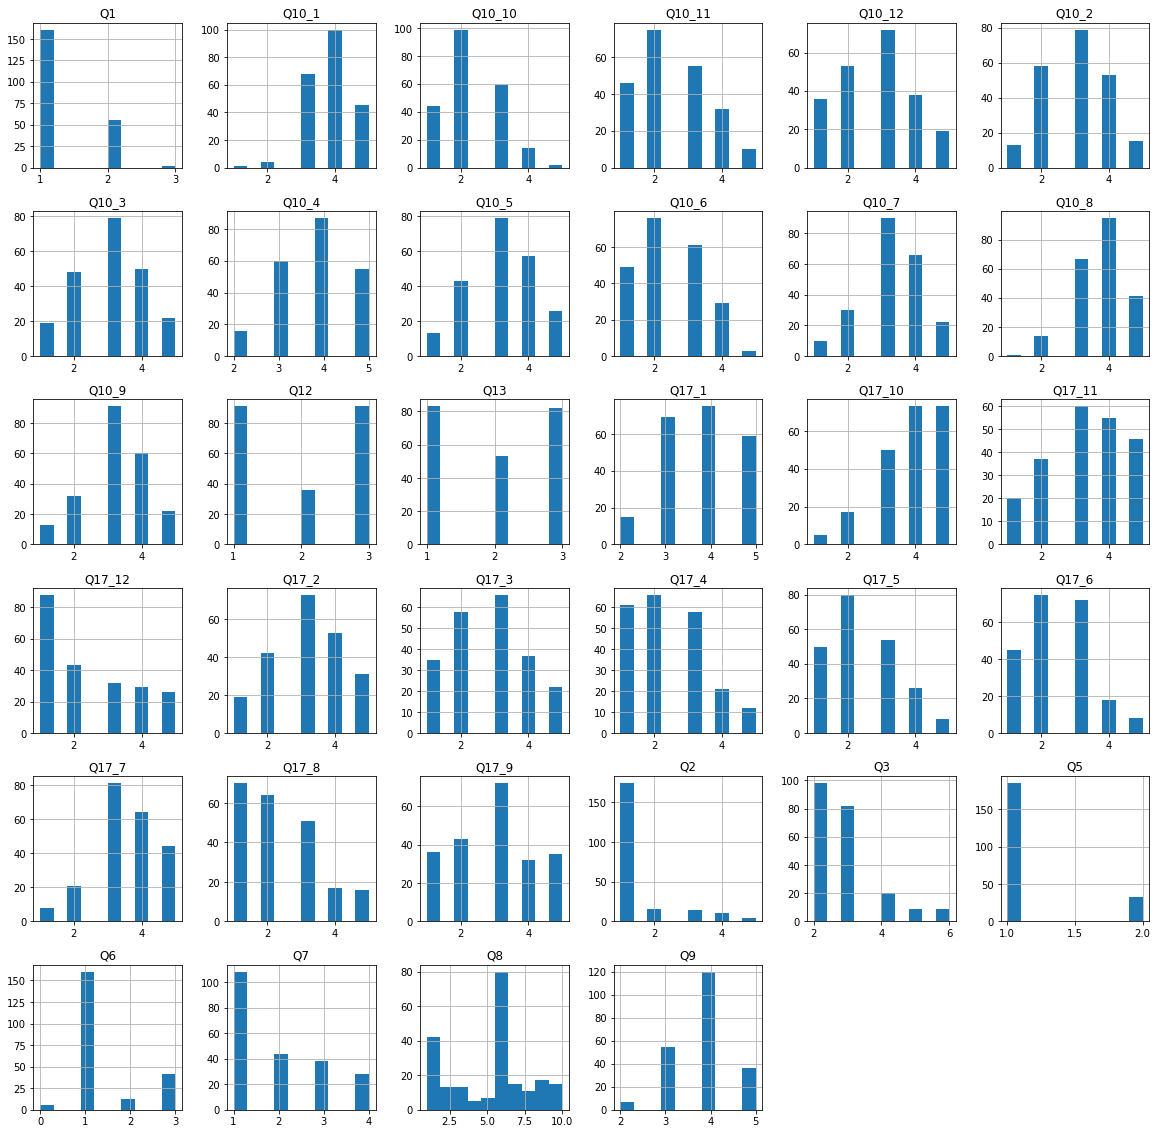

In [264]:
dataset_1.hist(figsize=(20, 20))
plt.show()

Text(0.5, 1.0, 'Density by levels of strees and Anxiety')

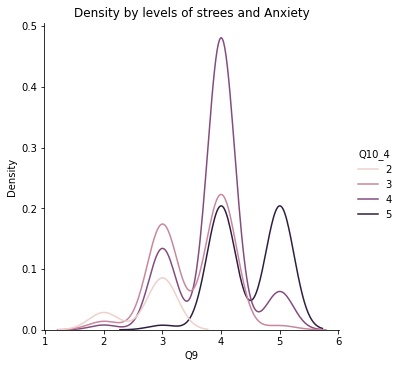

In [267]:
#Visualization for Anxiety and levels of strees
sns.displot(data=dataset_1, x="Q9", hue="Q10_4", kind="kde")
plt.title("Density by levels of strees and Anxiety")

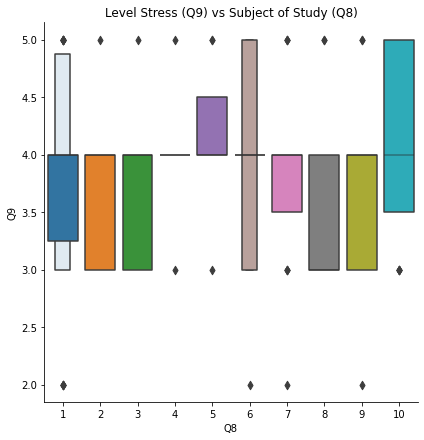

In [268]:
# Level stress vs subject of study
sns.catplot(y = "Q9", x = "Q8", data = dataset_1.sort_values("Q9", ascending = False), kind="boxen", height = 6, aspect = 1)
plt.title('Level Stress (Q9) vs Subject of Study (Q8)')
plt.show()

In [269]:
dataset_1

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12
0,1,1,3,2,1,1,1,4,3,2,...,1,1,1,1,3,1,1,5,2,1
1,1,1,3,1,1,2,3,3,4,3,...,2,1,3,3,3,1,3,3,3,1
2,1,1,6,1,1,4,1,4,4,2,...,4,2,3,2,5,1,5,2,3,4
3,1,2,3,1,1,4,1,3,3,3,...,1,2,1,2,3,3,2,3,3,2
4,1,1,2,1,2,1,6,3,3,2,...,2,2,2,3,3,1,1,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2,2,2,1,2,1,6,5,4,2,...,3,2,3,2,4,5,5,4,4,4
214,2,1,2,1,1,3,7,2,3,2,...,3,3,2,2,2,2,3,2,3,1
215,2,1,3,2,1,1,6,3,3,3,...,1,1,1,2,5,3,4,4,5,1
216,3,1,2,1,3,2,5,4,5,2,...,4,2,2,3,3,1,4,4,5,4


Text(0.5, 1.0, 'Stress level (Q9) vs Year of study (Q7) ')

<Figure size 576x288 with 0 Axes>

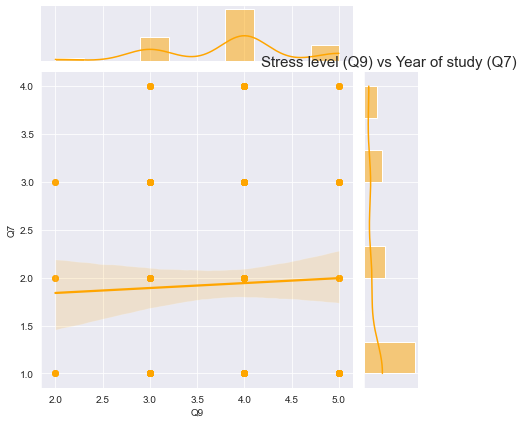

In [270]:
#Scatter plot

sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.jointplot(x='Q9', y='Q7', data=dataset_1, kind='reg', color='orange')
plt.title("Stress level (Q9) vs Year of study (Q7) ", fontsize=15)

### Correlations

In [271]:
corr1= dataset_1.corr()
corr1

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12
Q1,1.000000,-0.009384,-0.029506,-0.025658,-0.025303,-0.047388,-0.098372,-0.164819,-0.149343,-0.095003,...,-0.051769,-0.002574,-0.024420,-0.024678,-0.058583,-0.033288,-0.057640,-0.162080,-7.141970e-02,-0.060096
Q2,-0.009384,1.000000,0.226202,0.555565,-0.074745,0.071017,0.108246,0.086659,-0.022689,0.059543,...,-0.061370,0.145588,0.127674,0.177416,0.067942,0.037975,0.028312,0.070226,9.194541e-02,0.055372
Q3,-0.029506,0.226202,1.000000,0.348822,-0.216695,0.258582,-0.168036,-0.129657,-0.080976,-0.027162,...,-0.041433,-0.088423,0.017118,0.013894,-0.037167,-0.012871,-0.100919,-0.042929,-6.283617e-02,0.129133
Q5,-0.025658,0.555565,0.348822,1.000000,-0.133111,0.083901,0.007897,-0.000081,-0.128825,-0.023393,...,-0.116291,0.040806,-0.049058,0.048116,-0.017459,0.015585,-0.030273,-0.000795,-3.721192e-02,-0.027997
Q6,-0.025303,-0.074745,-0.216695,-0.133111,1.000000,-0.369625,0.092988,0.003679,-0.022513,0.013408,...,0.029087,0.080645,0.080557,-0.002865,-0.010634,0.104404,0.155098,-0.072923,7.476214e-02,0.235027
Q7,-0.047388,0.071017,0.258582,0.083901,-0.369625,1.000000,-0.138166,0.034349,0.047732,0.037319,...,-0.014168,-0.011757,0.012360,0.068770,0.132507,0.014222,-0.035702,0.025869,3.584139e-02,0.059829
Q8,-0.098372,0.108246,-0.168036,0.007897,0.092988,-0.138166,1.000000,0.054776,0.118186,-0.072275,...,-0.022690,0.113442,0.000587,-0.061136,-0.036876,-0.014768,-0.094410,-0.016228,-2.034113e-02,-0.230343
Q9,-0.164819,0.086659,-0.129657,-0.000081,0.003679,0.034349,0.054776,1.000000,0.470365,0.275009,...,0.295908,0.135059,0.207703,0.218970,0.395752,0.261489,0.079333,0.368613,2.389614e-01,0.174496
Q10_1,-0.149343,-0.022689,-0.080976,-0.128825,-0.022513,0.047732,0.118186,0.470365,1.000000,0.260691,...,0.356650,0.214340,0.271298,0.222578,0.318568,0.170395,0.105366,0.318234,2.705525e-01,0.171528
Q10_2,-0.095003,0.059543,-0.027162,-0.023393,0.013408,0.037319,-0.072275,0.275009,0.260691,1.000000,...,0.097618,0.116359,0.149597,0.197653,0.160478,0.099223,0.141314,0.139893,1.918519e-01,0.100065


**Get correlations of each features in a heatmap**

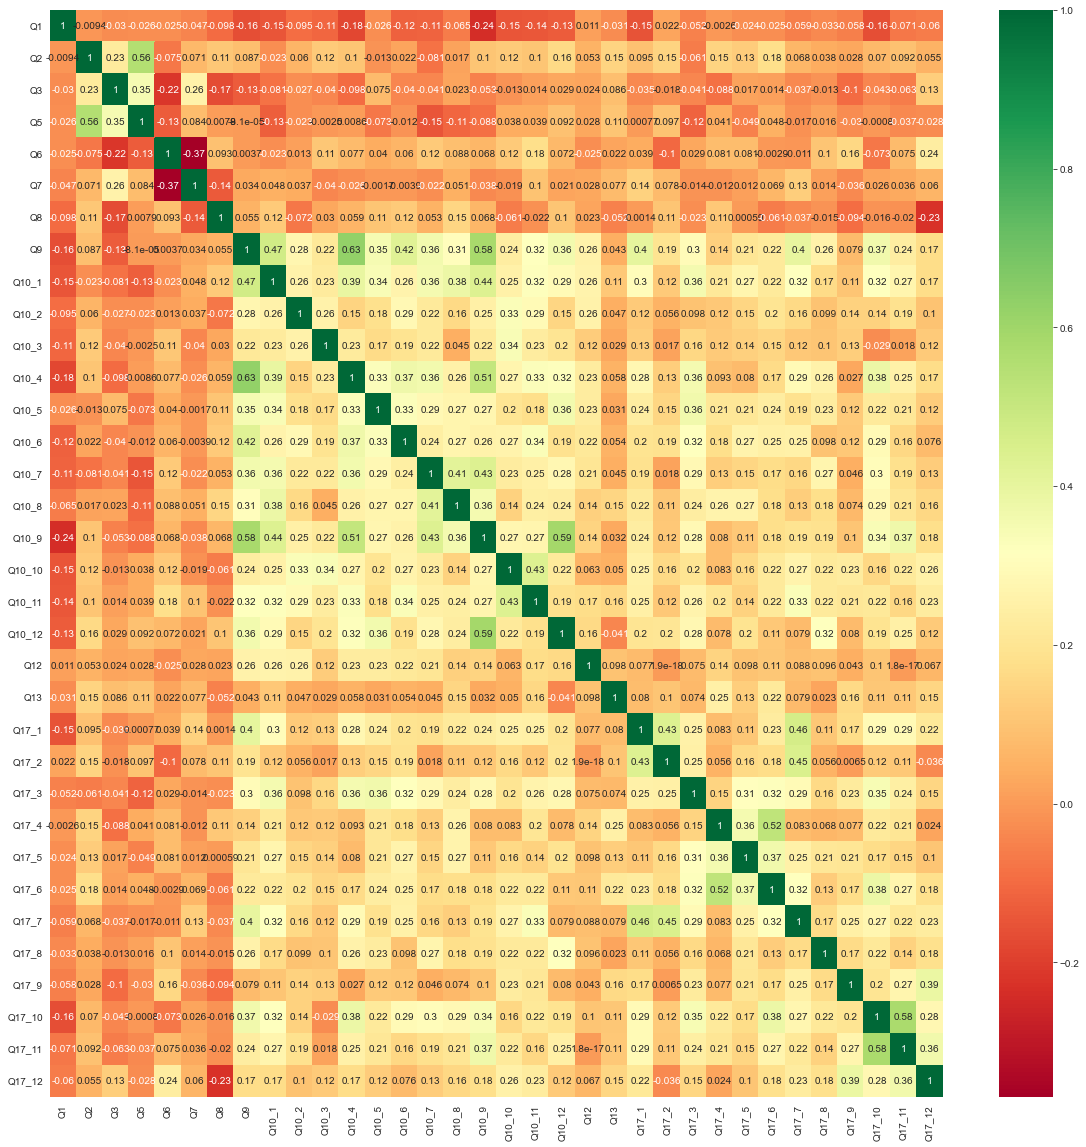

In [272]:
#sns.heatmap(corr1, annot=True)

top_corr_features = corr1.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(dataset_1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

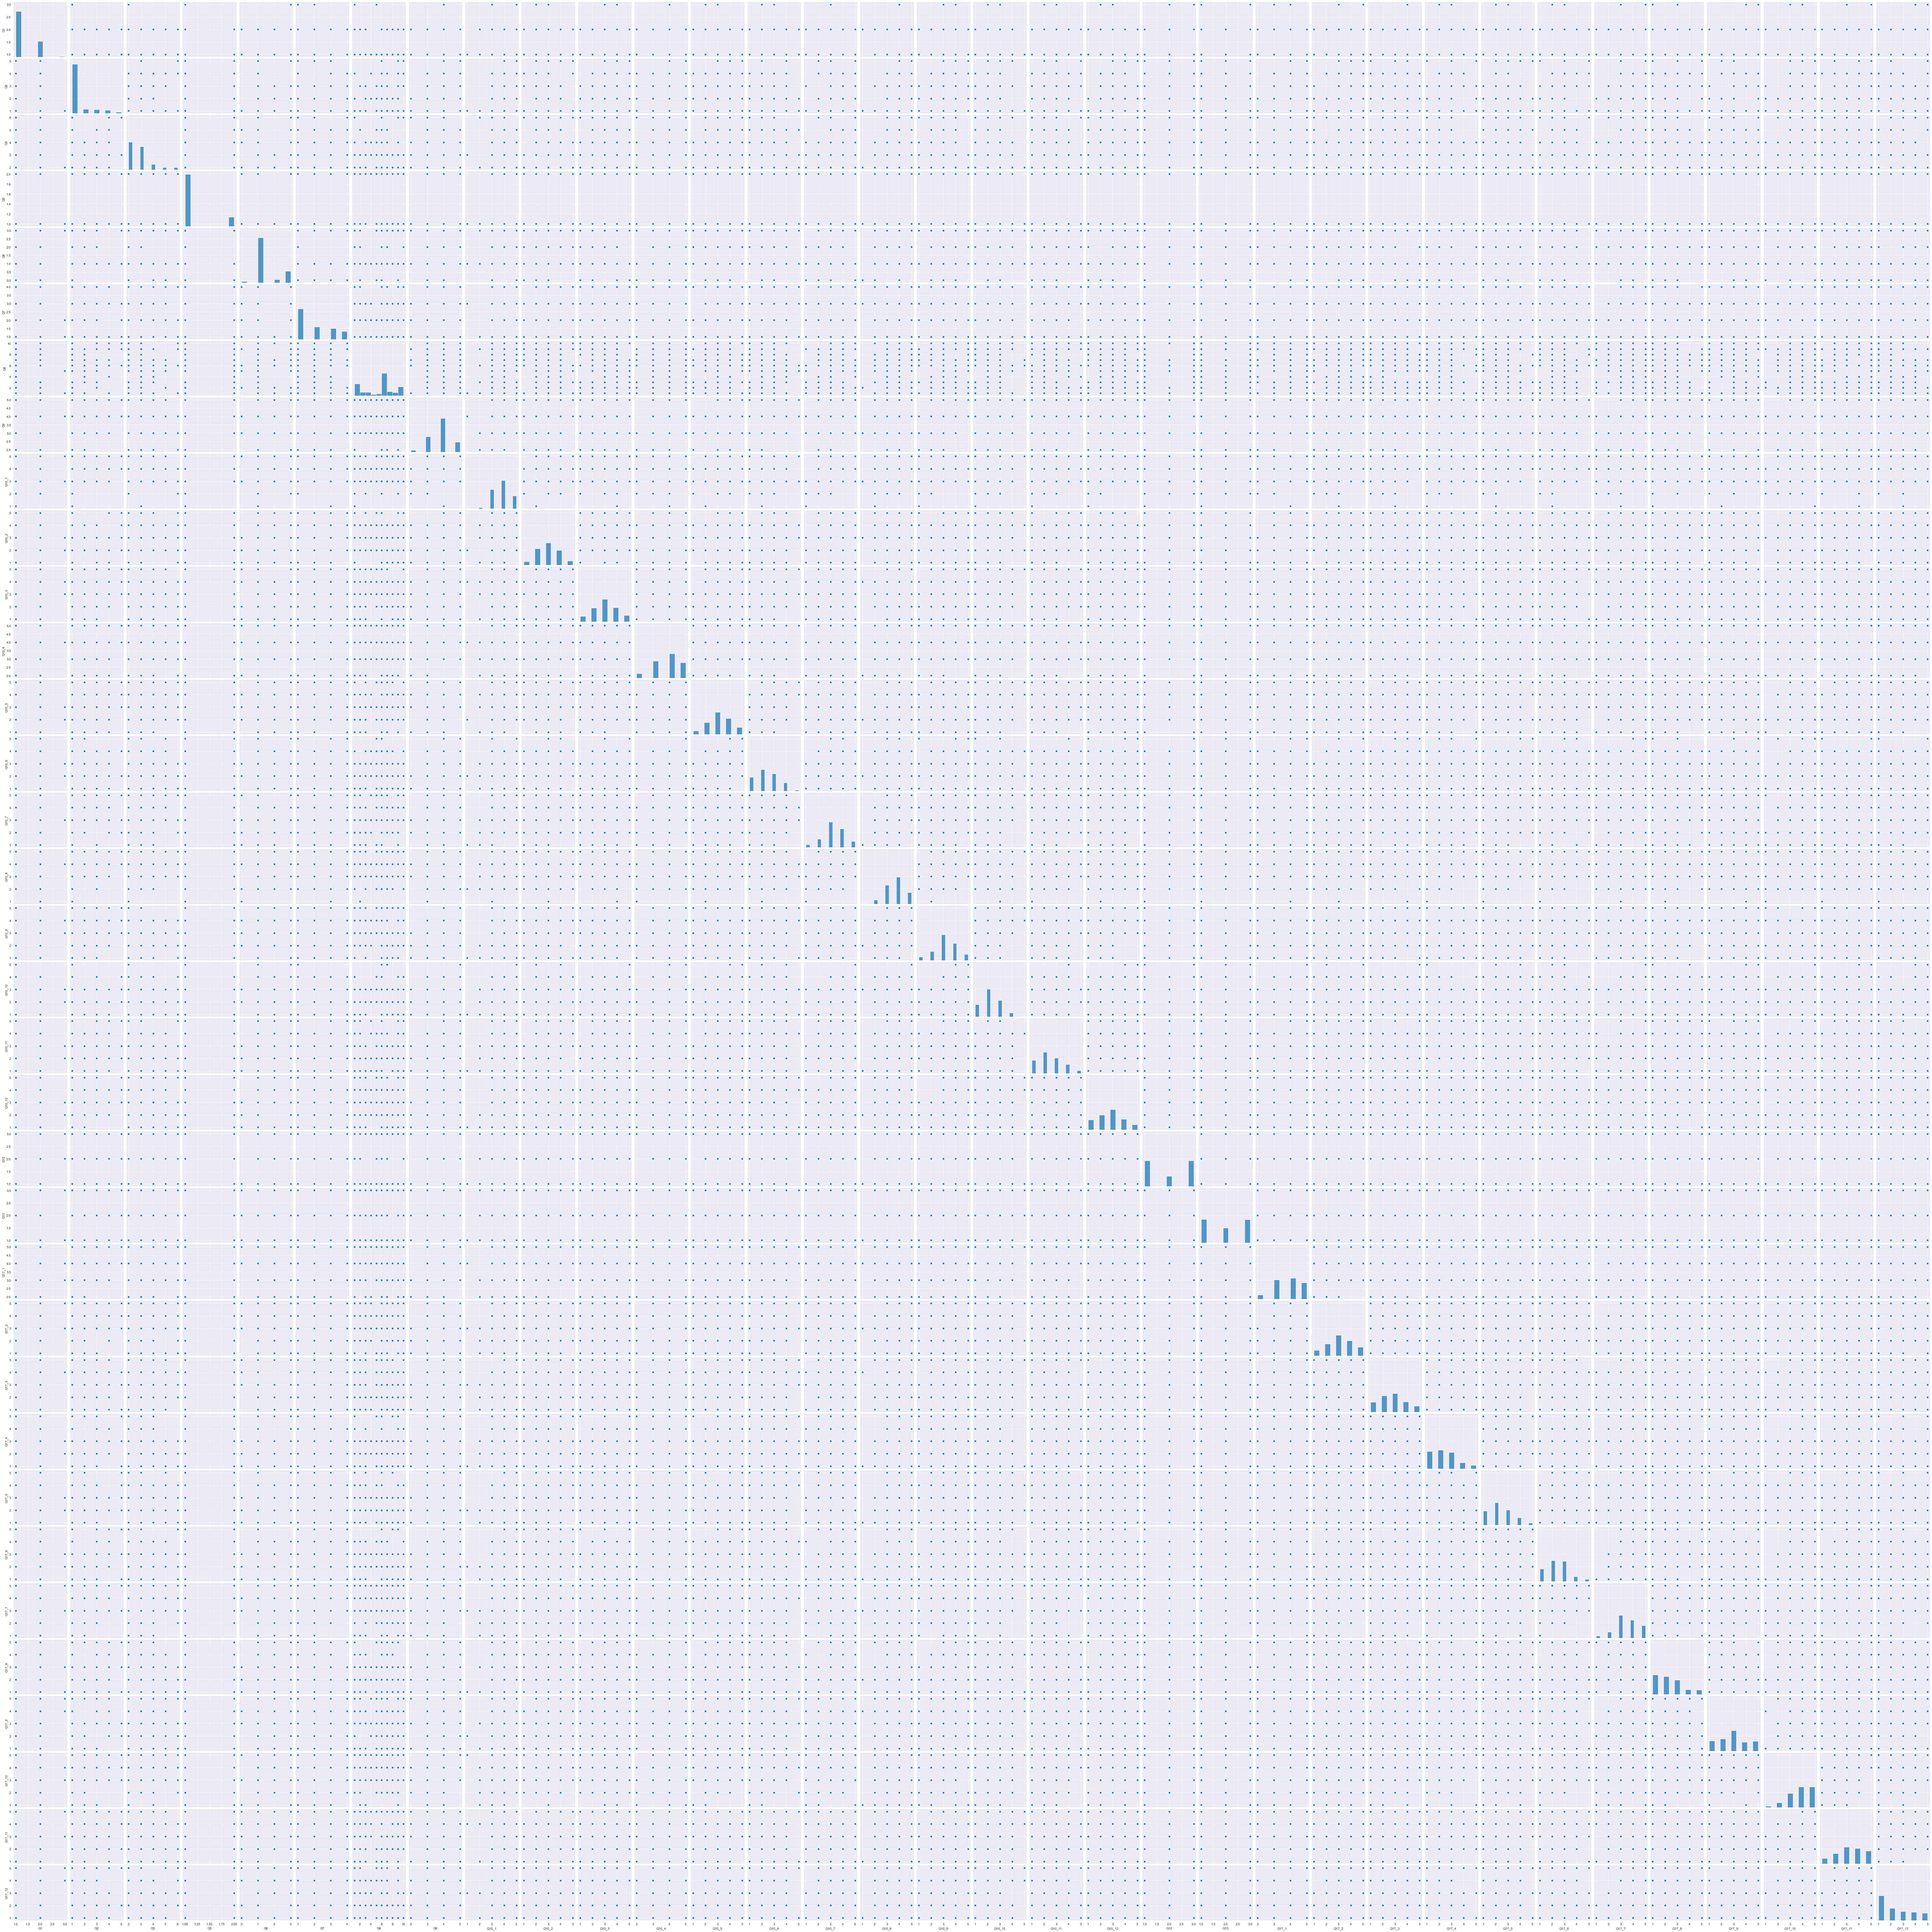

In [273]:
sns.pairplot(dataset_1)

## Reindex columns 

Reindex column Q9 (dependent feature) to the end that represents How is the stressed level over the last Semester.

In [274]:
dataset_1.sample(5)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12
7,1,1,2,1,3,3,1,4,4,1,...,4,4,3,4,5,3,4,5,3,5
121,1,2,3,1,1,1,5,4,3,3,...,3,2,3,2,2,2,2,2,1,1
163,2,1,3,1,1,4,6,4,5,3,...,2,2,2,2,3,2,2,5,5,1
209,2,3,2,1,2,1,6,4,3,2,...,1,3,2,4,5,2,5,5,5,3
86,1,1,2,1,2,1,6,3,3,1,...,3,1,1,1,3,1,1,2,2,4


In [275]:
dataset_1.columns

Index(['Q1', 'Q2', 'Q3', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10_1', 'Q10_2',
       'Q10_3', 'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7', 'Q10_8', 'Q10_9', 'Q10_10',
       'Q10_11', 'Q10_12', 'Q12', 'Q13', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4',
       'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10', 'Q17_11',
       'Q17_12'],
      dtype='object')

In [276]:
dataset_1 = dataset_1.reindex(columns=['Q1', 'Q2', 'Q3', 'Q5', 'Q6', 'Q7', 'Q8', 'Q10_1', 'Q10_2',
       'Q10_3', 'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7', 'Q10_8', 'Q10_9', 'Q10_10',
       'Q10_11', 'Q10_12', 'Q12', 'Q13', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4',
       'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10', 'Q17_11',
       'Q17_12', 'Q9'])

In [277]:
dataset_1.columns

Index(['Q1', 'Q2', 'Q3', 'Q5', 'Q6', 'Q7', 'Q8', 'Q10_1', 'Q10_2', 'Q10_3',
       'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7', 'Q10_8', 'Q10_9', 'Q10_10',
       'Q10_11', 'Q10_12', 'Q12', 'Q13', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4',
       'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10', 'Q17_11',
       'Q17_12', 'Q9'],
      dtype='object')

In [278]:
dataset_1.sample(5)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q10_1,Q10_2,Q10_3,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q9
75,1,1,4,1,1,3,9,4,2,3,...,1,2,1,4,5,1,3,1,3,5
77,1,1,2,1,2,1,10,5,4,2,...,2,1,1,5,1,4,5,4,1,5
108,1,1,5,1,3,1,5,5,4,5,...,3,4,4,5,3,5,4,5,5,5
197,2,1,2,1,1,1,6,4,4,3,...,2,1,5,4,2,3,3,1,1,5
64,1,1,2,1,1,1,8,4,4,3,...,3,1,3,2,3,2,4,3,1,4


### Feature Scaling

In [279]:
dataNorm = dataset_1.copy()

**Standardization Dataset**

In [280]:
scaling = StandardScaler()

In [281]:
data_stand = scaling.fit_transform(dataNorm)

In [282]:
data_stand = pd.DataFrame(data_stand)

In [283]:
data_stand.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
42,-0.582675,-0.446014,0.147373,-0.422349,1.953976,-0.861688,1.345099,0.199903,0.004535,-0.033493,...,-0.300788,-0.342243,-0.391713,-0.510990,0.591685,0.82662,-0.852097,-0.259601,1.148626,-1.173498
143,-0.582675,-0.446014,1.120927,2.367712,-1.728734,0.059135,-0.078355,-1.081829,-0.984200,-0.946178,...,-1.175078,-0.342243,-0.391713,-0.510990,-1.072668,0.04652,-0.852097,-1.068074,-0.258118,0.209327
126,-0.582675,-0.446014,0.147373,-0.422349,-0.501164,-0.861688,0.633372,1.481635,0.004535,-0.946178,...,0.573502,-0.342243,0.589821,0.457669,-0.240491,1.60672,1.082873,1.357344,1.148626,0.209327
156,-0.582675,1.667704,2.094481,2.367712,-0.501164,-0.861688,-1.145946,0.199903,-0.984200,-0.946178,...,0.573502,0.590369,1.571355,-0.510990,1.423861,0.04652,1.082873,0.548871,-0.258118,-1.173498
159,-0.582675,-0.446014,0.147373,-0.422349,1.953976,-0.861688,0.277508,1.481635,0.004535,0.879192,...,1.447792,1.522982,0.589821,0.457669,0.591685,0.04652,1.082873,-0.259601,-0.961490,1.592151


**Normalize Dataset**

In [284]:
scalingMinMax=MinMaxScaler()

In [285]:
data_scaled = scalingMinMax.fit_transform(dataNorm)

In [286]:
data_scaled = pd.DataFrame(data_scaled)

In [287]:
data_scaled.head(5)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.0,0.00,0.25,1.0,0.333333,0.000000,0.000000,0.50,0.25,0.00,...,0.00,0.00,0.00,0.5,0.0,0.00,1.00,0.25,0.00,0.666667
1,0.0,0.00,0.25,0.0,0.333333,0.333333,0.222222,0.75,0.50,1.00,...,0.00,0.50,0.50,0.5,0.0,0.50,0.50,0.50,0.00,0.333333
2,0.0,0.00,1.00,0.0,0.333333,1.000000,0.000000,0.75,0.25,0.50,...,0.25,0.50,0.25,1.0,0.0,1.00,0.25,0.50,0.75,0.666667
3,0.0,0.25,0.25,0.0,0.333333,1.000000,0.000000,0.50,0.50,0.25,...,0.25,0.00,0.25,0.5,0.5,0.25,0.50,0.50,0.25,0.333333
4,0.0,0.00,0.00,0.0,0.666667,0.000000,0.555556,0.50,0.25,0.50,...,0.25,0.25,0.50,0.5,0.0,0.00,0.50,0.75,0.50,0.333333


**Normalize Dataset with MinMax**

In [288]:
dataset_minmax = dataNorm.apply(lambda x: (x - x.min(axis = 0))/ (x.max(axis=0)- x.min(axis=0)))

In [289]:
dataset_minmax

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q10_1,Q10_2,Q10_3,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q9
0,0.0,0.00,0.25,1.0,0.333333,0.000000,0.000000,0.50,0.25,0.00,...,0.00,0.00,0.00,0.50,0.00,0.00,1.00,0.25,0.00,0.666667
1,0.0,0.00,0.25,0.0,0.333333,0.333333,0.222222,0.75,0.50,1.00,...,0.00,0.50,0.50,0.50,0.00,0.50,0.50,0.50,0.00,0.333333
2,0.0,0.00,1.00,0.0,0.333333,1.000000,0.000000,0.75,0.25,0.50,...,0.25,0.50,0.25,1.00,0.00,1.00,0.25,0.50,0.75,0.666667
3,0.0,0.25,0.25,0.0,0.333333,1.000000,0.000000,0.50,0.50,0.25,...,0.25,0.00,0.25,0.50,0.50,0.25,0.50,0.50,0.25,0.333333
4,0.0,0.00,0.00,0.0,0.666667,0.000000,0.555556,0.50,0.25,0.50,...,0.25,0.25,0.50,0.50,0.00,0.00,0.50,0.75,0.50,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.5,0.25,0.00,0.0,0.666667,0.000000,0.555556,0.75,0.25,0.50,...,0.25,0.50,0.25,0.75,1.00,1.00,0.75,0.75,0.75,1.000000
214,0.5,0.00,0.00,0.0,0.333333,0.666667,0.666667,0.50,0.25,0.50,...,0.50,0.25,0.25,0.25,0.25,0.50,0.25,0.50,0.00,0.000000
215,0.5,0.00,0.25,1.0,0.333333,0.000000,0.555556,0.50,0.50,0.25,...,0.00,0.00,0.25,1.00,0.50,0.75,0.75,1.00,0.00,0.333333
216,1.0,0.00,0.00,0.0,1.000000,0.333333,0.444444,1.00,0.25,0.50,...,0.25,0.25,0.50,0.50,0.00,0.75,0.75,1.00,0.75,0.666667


In [290]:
dataset_minmax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q1      218 non-null    float64
 1   Q2      218 non-null    float64
 2   Q3      218 non-null    float64
 3   Q5      218 non-null    float64
 4   Q6      218 non-null    float64
 5   Q7      218 non-null    float64
 6   Q8      218 non-null    float64
 7   Q10_1   218 non-null    float64
 8   Q10_2   218 non-null    float64
 9   Q10_3   218 non-null    float64
 10  Q10_4   218 non-null    float64
 11  Q10_5   218 non-null    float64
 12  Q10_6   218 non-null    float64
 13  Q10_7   218 non-null    float64
 14  Q10_8   218 non-null    float64
 15  Q10_9   218 non-null    float64
 16  Q10_10  218 non-null    float64
 17  Q10_11  218 non-null    float64
 18  Q10_12  218 non-null    float64
 19  Q12     218 non-null    float64
 20  Q13     218 non-null    float64
 21  Q17_1   218 non-null    float64
 22  Q1

## Feature Selection

In [291]:
dataset_minmax.sample(5)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q10_1,Q10_2,Q10_3,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q9
53,0.0,0.0,0.0,0.0,0.333333,0.000000,0.777778,0.75,0.00,0.00,...,1.00,0.50,1.00,1.00,0.00,0.00,1.00,0.75,0.00,1.000000
103,0.0,0.0,0.0,0.0,0.333333,0.000000,0.555556,0.75,0.75,0.75,...,0.25,1.00,0.75,1.00,0.75,1.00,1.00,0.50,0.00,0.666667
146,0.0,0.0,0.0,0.0,0.666667,0.000000,0.555556,0.75,1.00,0.50,...,1.00,0.75,0.75,0.75,0.50,0.25,1.00,0.50,0.50,0.666667
13,0.0,0.0,0.0,0.0,0.333333,0.000000,0.111111,0.50,0.50,0.50,...,0.25,0.00,0.00,0.75,0.00,0.50,0.75,0.00,0.00,0.666667
143,0.0,0.0,0.5,1.0,0.000000,0.333333,0.444444,0.50,0.25,0.25,...,0.00,0.25,0.25,0.50,0.00,0.50,0.50,0.25,0.25,0.666667


In [292]:
dataset_2 = dataset_minmax.copy().corr()

In [293]:
dataset_2

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q10_1,Q10_2,Q10_3,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q9
Q1,1.000000,-0.009384,-0.029506,-0.025658,-0.025303,-0.047388,-0.098372,-0.149343,-0.095003,-0.109651,...,-0.002574,-0.024420,-0.024678,-0.058583,-0.033288,-0.057640,-0.162080,-7.141970e-02,-0.060096,-0.164819
Q2,-0.009384,1.000000,0.226202,0.555565,-0.074745,0.071017,0.108246,-0.022689,0.059543,0.117802,...,0.145588,0.127674,0.177416,0.067942,0.037975,0.028312,0.070226,9.194541e-02,0.055372,0.086659
Q3,-0.029506,0.226202,1.000000,0.348822,-0.216695,0.258582,-0.168036,-0.080976,-0.027162,-0.039899,...,-0.088423,0.017118,0.013894,-0.037167,-0.012871,-0.100919,-0.042929,-6.283617e-02,0.129133,-0.129657
Q5,-0.025658,0.555565,0.348822,1.000000,-0.133111,0.083901,0.007897,-0.128825,-0.023393,-0.002465,...,0.040806,-0.049058,0.048116,-0.017459,0.015585,-0.030273,-0.000795,-3.721192e-02,-0.027997,-0.000081
Q6,-0.025303,-0.074745,-0.216695,-0.133111,1.000000,-0.369625,0.092988,-0.022513,0.013408,0.106560,...,0.080645,0.080557,-0.002865,-0.010634,0.104404,0.155098,-0.072923,7.476214e-02,0.235027,0.003679
Q7,-0.047388,0.071017,0.258582,0.083901,-0.369625,1.000000,-0.138166,0.047732,0.037319,-0.040426,...,-0.011757,0.012360,0.068770,0.132507,0.014222,-0.035702,0.025869,3.584139e-02,0.059829,0.034349
Q8,-0.098372,0.108246,-0.168036,0.007897,0.092988,-0.138166,1.000000,0.118186,-0.072275,0.030153,...,0.113442,0.000587,-0.061136,-0.036876,-0.014768,-0.094410,-0.016228,-2.034113e-02,-0.230343,0.054776
Q10_1,-0.149343,-0.022689,-0.080976,-0.128825,-0.022513,0.047732,0.118186,1.000000,0.260691,0.226707,...,0.214340,0.271298,0.222578,0.318568,0.170395,0.105366,0.318234,2.705525e-01,0.171528,0.470365
Q10_2,-0.095003,0.059543,-0.027162,-0.023393,0.013408,0.037319,-0.072275,0.260691,1.000000,0.260939,...,0.116359,0.149597,0.197653,0.160478,0.099223,0.141314,0.139893,1.918519e-01,0.100065,0.275009
Q10_3,-0.109651,0.117802,-0.039899,-0.002465,0.106560,-0.040426,0.030153,0.226707,0.260939,1.000000,...,0.121698,0.136908,0.151253,0.116714,0.103434,0.132198,-0.028539,1.838337e-02,0.117979,0.215428


**Univariate Selection**

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the stress level Range Prediction Dataset.

(Naik, 2022)

In [294]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, Q1 to Q9
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q1      34 non-null     float64
 1   Q2      34 non-null     float64
 2   Q3      34 non-null     float64
 3   Q5      34 non-null     float64
 4   Q6      34 non-null     float64
 5   Q7      34 non-null     float64
 6   Q8      34 non-null     float64
 7   Q10_1   34 non-null     float64
 8   Q10_2   34 non-null     float64
 9   Q10_3   34 non-null     float64
 10  Q10_4   34 non-null     float64
 11  Q10_5   34 non-null     float64
 12  Q10_6   34 non-null     float64
 13  Q10_7   34 non-null     float64
 14  Q10_8   34 non-null     float64
 15  Q10_9   34 non-null     float64
 16  Q10_10  34 non-null     float64
 17  Q10_11  34 non-null     float64
 18  Q10_12  34 non-null     float64
 19  Q12     34 non-null     float64
 20  Q13     34 non-null     float64
 21  Q17_1   34 non-null     float64
 22  Q17_2   

In [295]:
#Selection of independent and dependent features

X = dataset_1.iloc[:,0:33]  #independent columns
y = dataset_1.iloc[:,-1]    #target column i.e Stress Level dependent columns

In [296]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [297]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [298]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [299]:
featureScores

,Specs,Score
0,Q1,1.087215
1,Q2,2.708128
2,Q3,2.035237
3,Q5,0.188655
4,Q6,2.449725
5,Q7,1.586074
6,Q8,7.293098
7,Q10_1,7.656607
8,Q10_2,7.659931
9,Q10_3,4.154341


In [300]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

     Specs      Score
15   Q10_9  23.127301
10   Q10_4  17.983804
12   Q10_6  17.478934
18  Q10_12  14.662134
17  Q10_11  12.237136
11   Q10_5  12.046921
27   Q17_7  10.596965
23   Q17_3   9.987831
28   Q17_8   9.456110
30  Q17_10   8.721160


**Feature Importance**

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

(Naik, 2022)

In [301]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [302]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.01662244 0.01618858 0.02315053 0.01133692 0.02237442 0.02440595
 0.03029845 0.03193081 0.04074486 0.0257864  0.08590922 0.03204259
 0.03388863 0.02572101 0.02837318 0.05827851 0.02466374 0.03196536
 0.03150306 0.0356731  0.02827946 0.03520349 0.0257739  0.02858718
 0.0239182  0.0269576  0.02719029 0.03025926 0.02631857 0.0237251
 0.03457404 0.03013622 0.02821893]


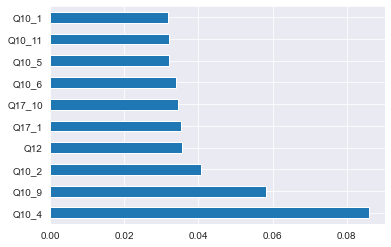

In [303]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [304]:
feat_importances.nlargest(10)

Q10_4     0.085909
Q10_9     0.058279
Q10_2     0.040745
Q12       0.035673
Q17_1     0.035203
Q17_10    0.034574
Q10_6     0.033889
Q10_5     0.032043
Q10_11    0.031965
Q10_1     0.031931
dtype: float64

**Feature Selection with Correlation Matrix Heatmap**

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

(Naik, 2022)

In [305]:
corr2= dataset_minmax.copy().corr()
corr2

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q10_1,Q10_2,Q10_3,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q9
Q1,1.000000,-0.009384,-0.029506,-0.025658,-0.025303,-0.047388,-0.098372,-0.149343,-0.095003,-0.109651,...,-0.002574,-0.024420,-0.024678,-0.058583,-0.033288,-0.057640,-0.162080,-7.141970e-02,-0.060096,-0.164819
Q2,-0.009384,1.000000,0.226202,0.555565,-0.074745,0.071017,0.108246,-0.022689,0.059543,0.117802,...,0.145588,0.127674,0.177416,0.067942,0.037975,0.028312,0.070226,9.194541e-02,0.055372,0.086659
Q3,-0.029506,0.226202,1.000000,0.348822,-0.216695,0.258582,-0.168036,-0.080976,-0.027162,-0.039899,...,-0.088423,0.017118,0.013894,-0.037167,-0.012871,-0.100919,-0.042929,-6.283617e-02,0.129133,-0.129657
Q5,-0.025658,0.555565,0.348822,1.000000,-0.133111,0.083901,0.007897,-0.128825,-0.023393,-0.002465,...,0.040806,-0.049058,0.048116,-0.017459,0.015585,-0.030273,-0.000795,-3.721192e-02,-0.027997,-0.000081
Q6,-0.025303,-0.074745,-0.216695,-0.133111,1.000000,-0.369625,0.092988,-0.022513,0.013408,0.106560,...,0.080645,0.080557,-0.002865,-0.010634,0.104404,0.155098,-0.072923,7.476214e-02,0.235027,0.003679
Q7,-0.047388,0.071017,0.258582,0.083901,-0.369625,1.000000,-0.138166,0.047732,0.037319,-0.040426,...,-0.011757,0.012360,0.068770,0.132507,0.014222,-0.035702,0.025869,3.584139e-02,0.059829,0.034349
Q8,-0.098372,0.108246,-0.168036,0.007897,0.092988,-0.138166,1.000000,0.118186,-0.072275,0.030153,...,0.113442,0.000587,-0.061136,-0.036876,-0.014768,-0.094410,-0.016228,-2.034113e-02,-0.230343,0.054776
Q10_1,-0.149343,-0.022689,-0.080976,-0.128825,-0.022513,0.047732,0.118186,1.000000,0.260691,0.226707,...,0.214340,0.271298,0.222578,0.318568,0.170395,0.105366,0.318234,2.705525e-01,0.171528,0.470365
Q10_2,-0.095003,0.059543,-0.027162,-0.023393,0.013408,0.037319,-0.072275,0.260691,1.000000,0.260939,...,0.116359,0.149597,0.197653,0.160478,0.099223,0.141314,0.139893,1.918519e-01,0.100065,0.275009
Q10_3,-0.109651,0.117802,-0.039899,-0.002465,0.106560,-0.040426,0.030153,0.226707,0.260939,1.000000,...,0.121698,0.136908,0.151253,0.116714,0.103434,0.132198,-0.028539,1.838337e-02,0.117979,0.215428


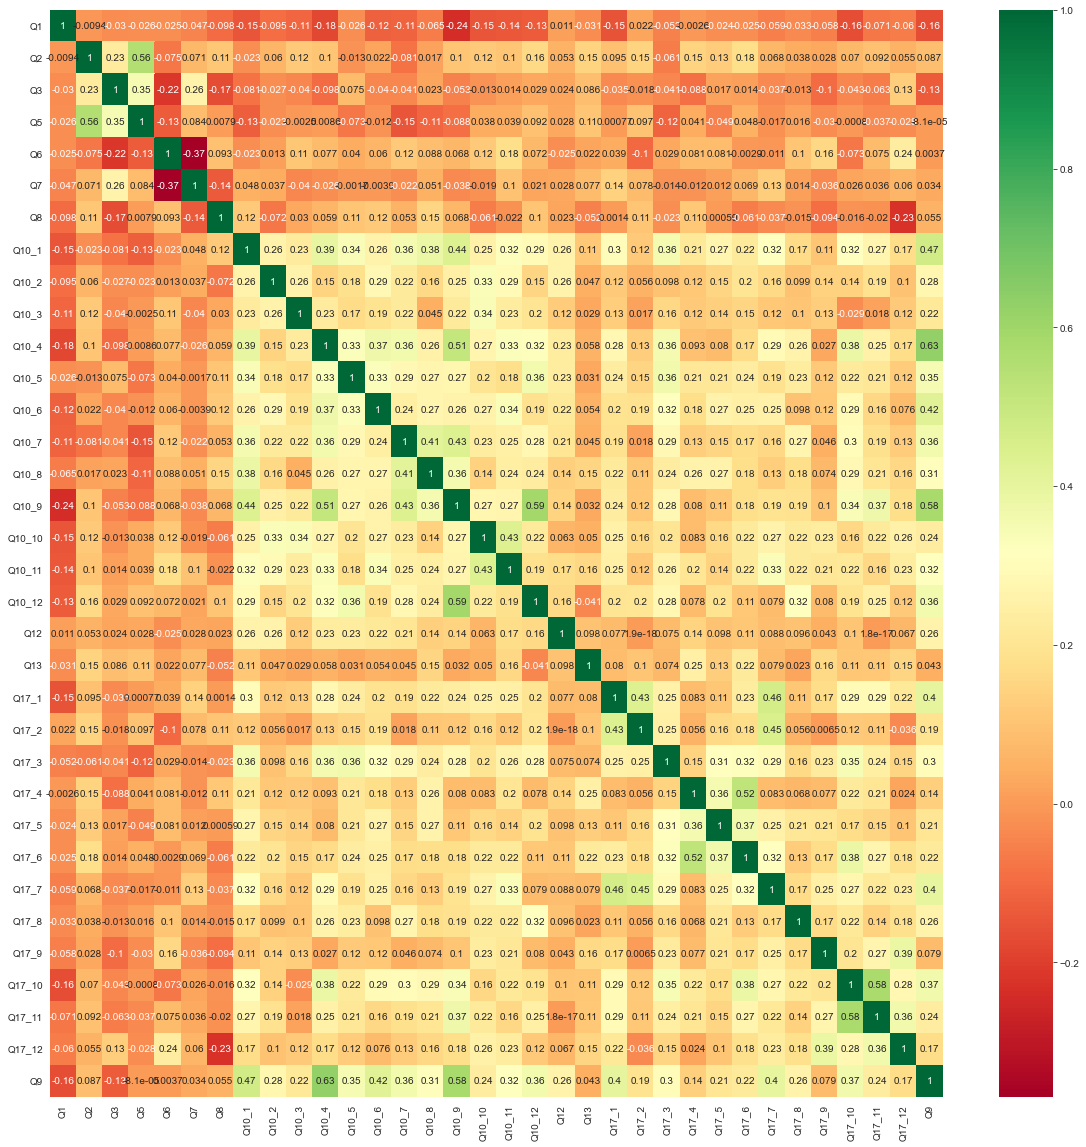

In [306]:
#sns.heatmap(corr1, annot=True)

top_corr_features = corr2.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(dataset_1[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [307]:
data_corr = dataset_1[top_corr_features].corr()

In [308]:
corr_top = data_corr.nlargest(11, 'Q9')
corr_top['Q9']

Q9        1.000000
Q10_4     0.629963
Q10_9     0.577683
Q10_1     0.470365
Q10_6     0.424913
Q17_1     0.403760
Q17_7     0.395752
Q17_10    0.368613
Q10_12    0.360038
Q10_7     0.358145
Q10_5     0.350746
Name: Q9, dtype: float64

In conclusion, when comparing the three feature selection techniques, it was decided to use Univariate selection, 
because it has more fields related to the output.


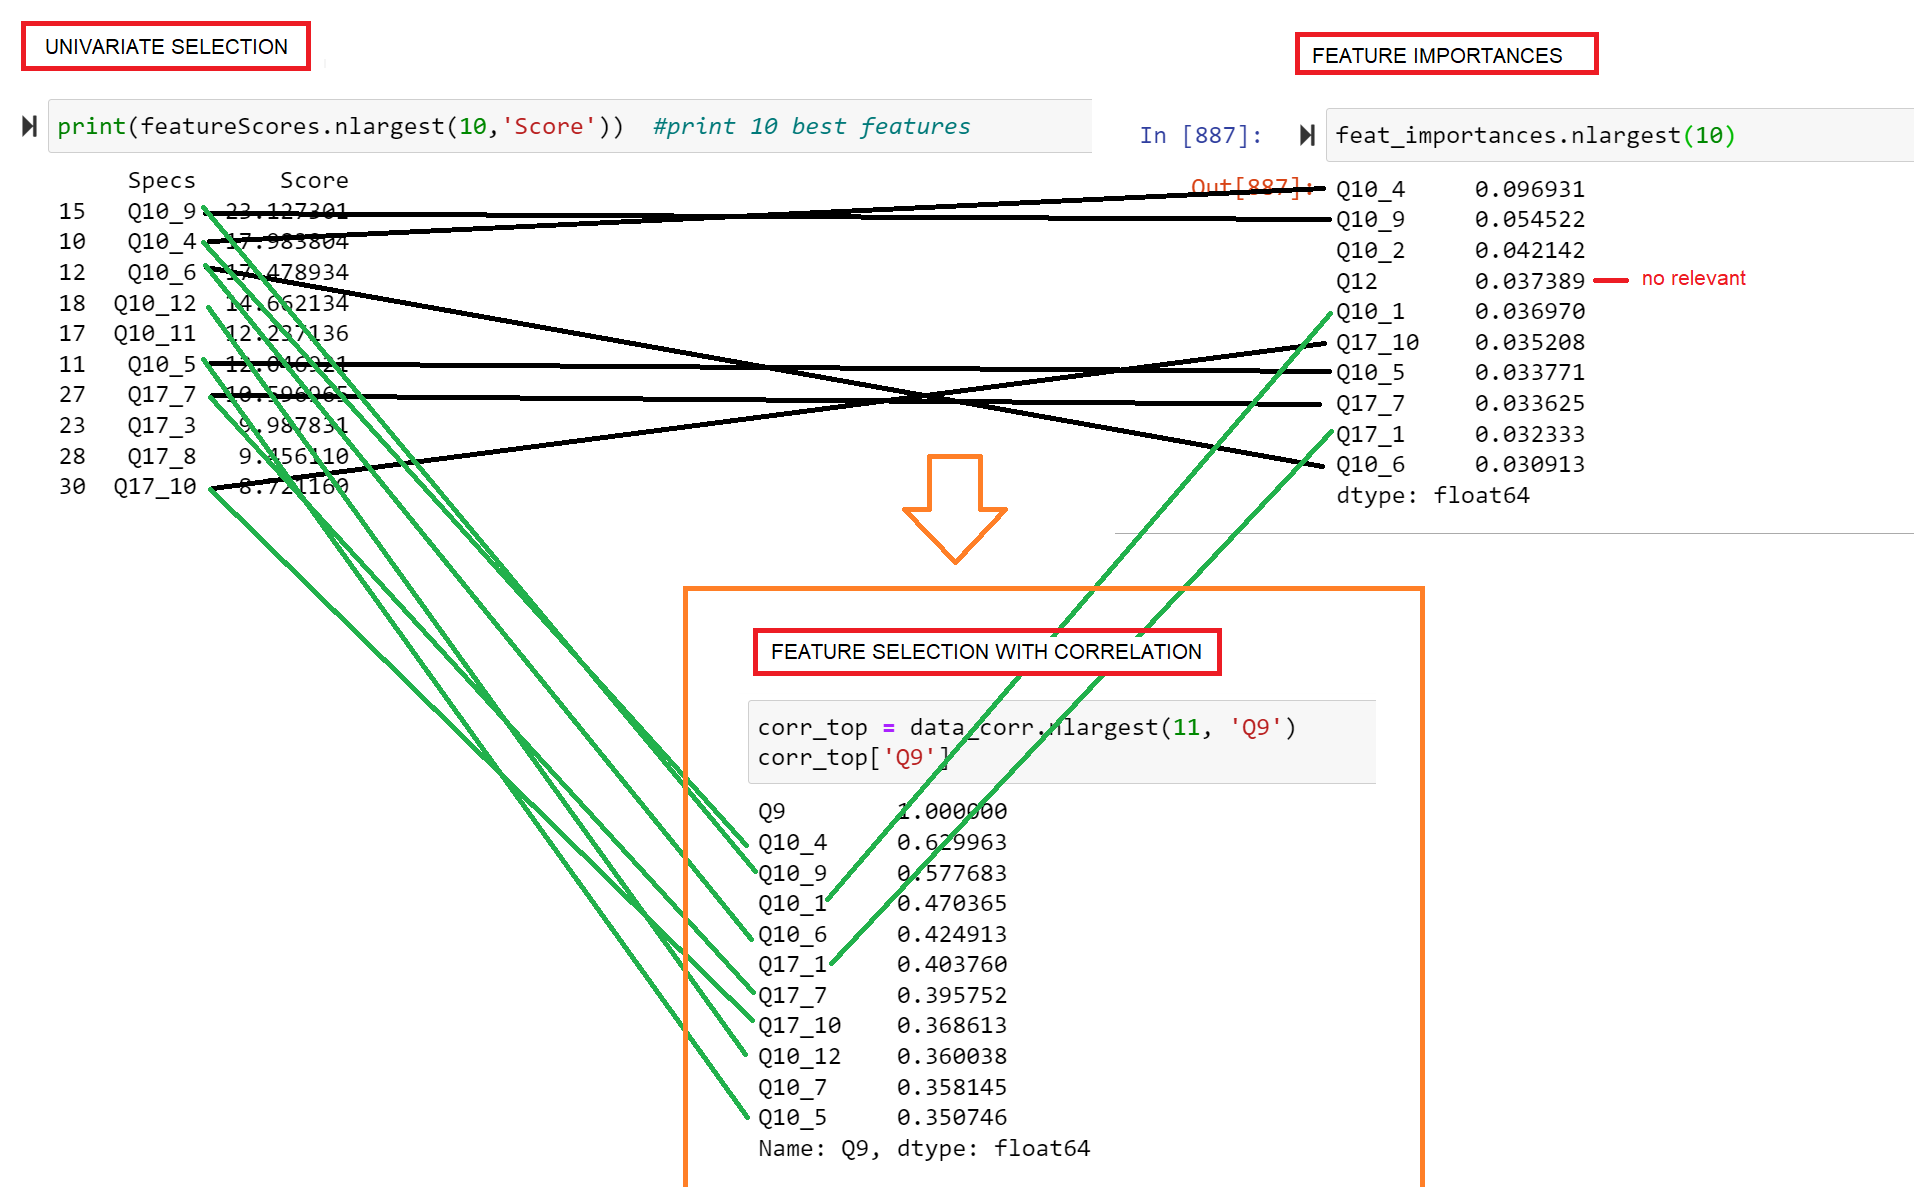

In [309]:
dataset_1.columns

Index(['Q1', 'Q2', 'Q3', 'Q5', 'Q6', 'Q7', 'Q8', 'Q10_1', 'Q10_2', 'Q10_3',
       'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7', 'Q10_8', 'Q10_9', 'Q10_10',
       'Q10_11', 'Q10_12', 'Q12', 'Q13', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4',
       'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10', 'Q17_11',
       'Q17_12', 'Q9'],
      dtype='object')

In [310]:
#dataset_minmax.columns

In [311]:
dataset_minmax.sample(5)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q10_1,Q10_2,Q10_3,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q9
31,0.0,0.00,0.50,0.0,0.333333,1.000000,0.555556,0.75,0.50,0.25,...,0.00,0.25,0.00,1.00,0.25,0.25,1.00,0.50,0.00,0.666667
176,0.5,0.00,0.00,0.0,0.666667,0.000000,0.000000,0.50,0.25,0.00,...,1.00,0.00,0.50,0.25,0.25,0.00,0.75,0.75,0.00,0.666667
153,0.0,0.00,0.00,0.0,0.333333,0.000000,0.555556,1.00,0.75,0.75,...,0.00,0.00,0.25,0.50,0.00,0.75,0.75,0.50,0.75,0.666667
154,0.0,0.75,0.25,1.0,0.333333,1.000000,0.000000,1.00,1.00,0.50,...,0.25,0.50,0.25,1.00,1.00,1.00,1.00,1.00,1.00,1.000000
170,0.5,0.00,0.25,0.0,0.333333,0.333333,0.111111,1.00,0.25,0.00,...,0.25,0.75,0.25,1.00,0.25,0.00,0.75,0.50,0.00,0.666667


In [312]:
dataset_sel = dataset_1.copy()

In [313]:
dataset_sel.drop(columns =['Q1', 'Q2', 'Q3', 'Q5', 'Q6', 'Q7', 'Q8', 'Q10_2', 'Q10_3', 'Q10_8', 'Q10_10',
                           'Q10_11', 'Q12', 'Q13', 'Q17_2', 'Q17_3', 'Q17_4', 'Q17_5', 'Q17_6', 'Q17_8', 
                           'Q17_9', 'Q17_11', 'Q17_12'], inplace = True)

In [314]:
dataset_sel.sample(5)

,Q10_1,Q10_4,Q10_5,Q10_6,Q10_7,Q10_9,Q10_12,Q17_1,Q17_7,Q17_10,Q9
154,5,5,4,3,4,4,3,5,5,5,5
43,4,4,3,3,2,3,3,4,3,5,4
127,3,2,2,1,1,3,4,3,2,3,3
36,4,4,2,1,3,3,3,4,5,4,4
171,3,3,1,3,3,3,2,4,4,5,3


## Multiple Model Accuracy

### First evaluation with Feature Selection by Correlation Matrix

### Create a Validation Dataset

In [315]:
dataset_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q10_1   218 non-null    int64
 1   Q10_4   218 non-null    int64
 2   Q10_5   218 non-null    int64
 3   Q10_6   218 non-null    int64
 4   Q10_7   218 non-null    int64
 5   Q10_9   218 non-null    int64
 6   Q10_12  218 non-null    int64
 7   Q17_1   218 non-null    int64
 8   Q17_7   218 non-null    int64
 9   Q17_10  218 non-null    int64
 10  Q9      218 non-null    int64
dtypes: int64(11)
memory usage: 18.9 KB


### Generate test design (Data set division)

In [316]:
array = dataset_sel.values
X = array[:,0:10]
y = array[:,10]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

### Build Models

Test for 6 different algorithms:
    
1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN).
4. Classification and Regression Trees (CART).
5. Gaussian Naive Bayes (NB).
6. Support Vector Machines (SVM).

In [317]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

Evaluate each model in turn

In [318]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.551797 (0.046421)
LDA: 0.614165 (0.079165)
KNN: 0.517045 (0.038472)
CART: 0.448864 (0.069901)
NB: 0.631739 (0.051850)
SVM: 0.591702 (0.028408)


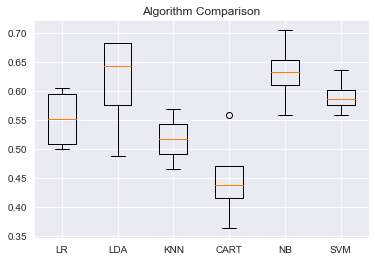

In [319]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

## Evaluations of algorithms

In [320]:
dataset_sel.sample(5)

,Q10_1,Q10_4,Q10_5,Q10_6,Q10_7,Q10_9,Q10_12,Q17_1,Q17_7,Q17_10,Q9
111,3,4,1,2,3,2,2,3,2,4,3
150,4,5,4,3,5,4,4,4,5,5,5
189,4,2,3,2,2,3,2,4,4,3,3
61,5,4,3,1,4,5,5,5,1,2,4
211,4,5,4,4,3,3,2,3,2,5,4


In [321]:
dataset_sel.columns

Index(['Q10_1', 'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7', 'Q10_9', 'Q10_12', 'Q17_1',
       'Q17_7', 'Q17_10', 'Q9'],
      dtype='object')

In [322]:
dataset_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q10_1   218 non-null    int64
 1   Q10_4   218 non-null    int64
 2   Q10_5   218 non-null    int64
 3   Q10_6   218 non-null    int64
 4   Q10_7   218 non-null    int64
 5   Q10_9   218 non-null    int64
 6   Q10_12  218 non-null    int64
 7   Q17_1   218 non-null    int64
 8   Q17_7   218 non-null    int64
 9   Q17_10  218 non-null    int64
 10  Q9      218 non-null    int64
dtypes: int64(11)
memory usage: 18.9 KB


In [323]:
#dataset_1.info()

### Generate test design (Data set division)

In [324]:
dataset_pivot = dataset_sel.copy()

In [325]:
array =  dataset_pivot.values #dataset_1.values
X = array[:,0:10]
y = array[:,10]


In [326]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold

selection = VarianceThreshold(threshold=(0.1))    
X = selection.fit_transform(X)
X.shape

(218, 10)

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [328]:
#X_train.shape, X_test.shape,  y_train.shape, y_test.shape 

print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (174, 10)
y_train : (174,)
X_test : (44, 10)
y_test : (44,)


### Hyperparameter Using Grid Search - K nearest neighbors

In [329]:
# step-1: specify range of hyperparameters to tune
hyper_params = [{'n_neighbors': list(range(1,11))}]

In [330]:
# step-2: perform grid search
# 2.1 specify model
knn_Model = KNeighborsClassifier()
          

# 2.2 call GridSearchCV()
modelknn_cv = GridSearchCV(estimator = knn_Model, 
                        param_grid = hyper_params, 
                        
                        return_train_score=True)      

# fit the model
modelknn_cv.fit(X_train, y_train) 

C:\Users\axk_l\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.



GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True)

In [331]:
# cv results
cv_resultsknn = pd.DataFrame(modelknn_cv.cv_results_)
cv_resultsknn

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000303,0.000401,0.000605,0.000809,1,{'n_neighbors': 1},0.514286,0.428571,0.514286,0.514286,...,0.506050,0.042406,8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.001605,0.003210,0.003198,0.003917,2,{'n_neighbors': 2},0.485714,0.428571,0.485714,0.457143,...,0.477311,0.033580,10,0.776978,0.769784,0.748201,0.769784,0.785714,0.770092,0.012417
2,0.000000,0.000000,0.001599,0.003198,3,{'n_neighbors': 3},0.400000,0.571429,0.514286,0.428571,...,0.500504,0.075090,9,0.769784,0.733813,0.726619,0.776978,0.757143,0.752867,0.019687
3,0.000000,0.000000,0.001599,0.003198,4,{'n_neighbors': 4},0.600000,0.571429,0.628571,0.428571,...,0.539832,0.077028,7,0.683453,0.690647,0.690647,0.719424,0.714286,0.699692,0.014350
4,0.000000,0.000000,0.001598,0.003197,5,{'n_neighbors': 5},0.485714,0.542857,0.628571,0.457143,...,0.546387,0.068543,6,0.683453,0.654676,0.733813,0.719424,0.685714,0.695416,0.028099
5,0.001599,0.003197,0.000000,0.000000,6,{'n_neighbors': 6},0.628571,0.571429,0.600000,0.485714,...,0.563025,0.050677,5,0.661871,0.633094,0.712230,0.726619,0.664286,0.679620,0.034604
6,0.000000,0.000000,0.001599,0.003198,7,{'n_neighbors': 7},0.657143,0.600000,0.657143,0.485714,...,0.603529,0.062994,1,0.661871,0.654676,0.712230,0.719424,0.664286,0.682497,0.027491
7,0.001598,0.003197,0.000000,0.000000,8,{'n_neighbors': 8},0.657143,0.514286,0.685714,0.485714,...,0.580336,0.078463,3,0.654676,0.690647,0.726619,0.719424,0.635714,0.685416,0.035487
8,0.000000,0.000000,0.001599,0.003198,9,{'n_neighbors': 9},0.685714,0.571429,0.600000,0.485714,...,0.586218,0.063896,2,0.683453,0.683453,0.690647,0.705036,0.685714,0.689661,0.008124
9,0.001599,0.003199,0.001592,0.003184,10,{'n_neighbors': 10},0.628571,0.600000,0.600000,0.485714,...,0.568739,0.052866,4,0.705036,0.683453,0.669065,0.705036,0.678571,0.688232,0.014480


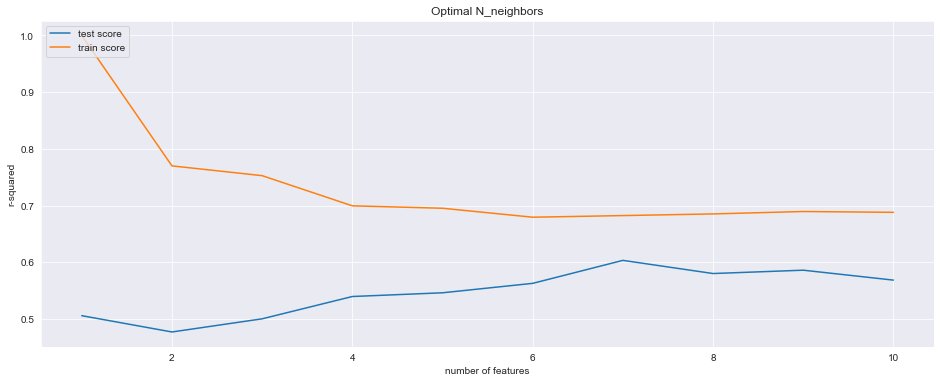

In [332]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_resultsknn["param_n_neighbors"], cv_resultsknn["mean_test_score"])
plt.plot(cv_resultsknn["param_n_neighbors"], cv_resultsknn["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal N_neighbors")
plt.legend(['test score', 'train score'], loc='upper left')

In [333]:
pprint(modelknn_cv.best_params_)

{'n_neighbors': 7}


### Hyperparameter Using Grid Search - DecisionTree

In [334]:
# step-1: specify range of hyperparameters to tune
hyper_params = [{'max_depth': list(range(1,11))}]

In [335]:
# step-2: perform grid search
# 2.1 specify model
dt_Model = DecisionTreeClassifier()
          

# 2.2 call GridSearchCV()
modeldt_cv = GridSearchCV(estimator = dt_Model, 
                        param_grid = hyper_params, 
                        return_train_score=True)      

# fit the model
modeldt_cv.fit(X_train, y_train) 

C:\Users\axk_l\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.



GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True)

In [336]:
# cv results
cv_resultsdt = pd.DataFrame(modeldt_cv.cv_results_)
cv_resultsdt

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000509,0.000445,0.0000,0.0000,1,{'max_depth': 1},0.571429,0.542857,0.600000,0.542857,...,0.563193,0.021301,8,0.597122,0.604317,0.618705,0.553957,0.550000,0.584820,0.027729
1,0.000405,0.000496,0.0002,0.0004,2,{'max_depth': 2},0.600000,0.485714,0.600000,0.628571,...,0.580504,0.049225,4,0.618705,0.633094,0.654676,0.654676,0.664286,0.645087,0.016687
2,0.000399,0.000489,0.0002,0.0004,3,{'max_depth': 3},0.571429,0.542857,0.571429,0.628571,...,0.580504,0.028115,4,0.705036,0.697842,0.676259,0.690647,0.700000,0.693957,0.009985
3,0.001605,0.003211,0.0000,0.0000,4,{'max_depth': 4},0.657143,0.542857,0.542857,0.628571,...,0.603697,0.050514,1,0.769784,0.733813,0.719424,0.755396,0.764286,0.748541,0.019031
4,0.000000,0.000000,0.0000,0.0000,5,{'max_depth': 5},0.657143,0.542857,0.628571,0.571429,...,0.597647,0.040679,2,0.805755,0.791367,0.791367,0.812950,0.828571,0.806002,0.014043
5,0.001600,0.003200,0.0000,0.0000,6,{'max_depth': 6},0.628571,0.457143,0.685714,0.542857,...,0.580504,0.077556,4,0.863309,0.863309,0.848921,0.848921,0.857143,0.856321,0.006448
6,0.001598,0.003196,0.0000,0.0000,7,{'max_depth': 7},0.542857,0.485714,0.685714,0.457143,...,0.534286,0.080610,10,0.913669,0.913669,0.892086,0.884892,0.892857,0.899435,0.011950
7,0.001599,0.003199,0.0000,0.0000,8,{'max_depth': 8},0.485714,0.514286,0.714286,0.514286,...,0.563361,0.082756,7,0.964029,0.928058,0.935252,0.928058,0.928571,0.936793,0.013888
8,0.000000,0.000000,0.0000,0.0000,9,{'max_depth': 9},0.428571,0.514286,0.628571,0.571429,...,0.540336,0.066729,9,0.985612,0.956835,0.964029,0.971223,0.971429,0.969825,0.009551
9,0.000000,0.000000,0.0000,0.0000,10,{'max_depth': 10},0.485714,0.628571,0.657143,0.571429,...,0.586218,0.058563,3,1.000000,0.964029,0.985612,0.971223,0.971429,0.978458,0.012847


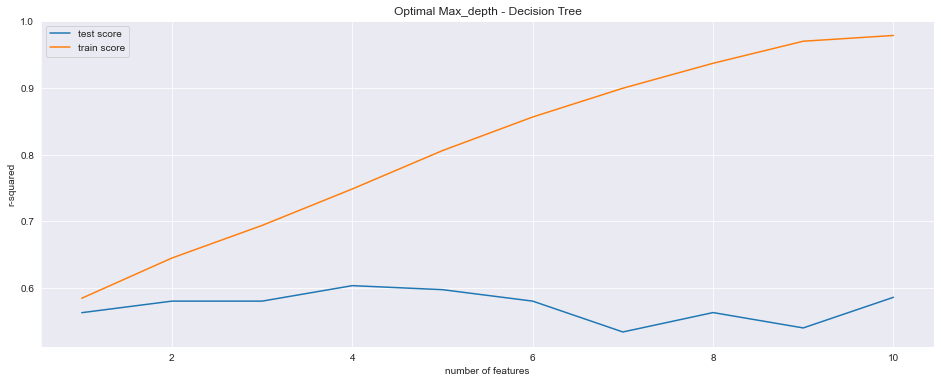

In [337]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_resultsdt["param_max_depth"], cv_resultsdt["mean_test_score"])
plt.plot(cv_resultsdt["param_max_depth"], cv_resultsdt["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Max_depth - Decision Tree")
plt.legend(['test score', 'train score'], loc='upper left')

In [338]:
pprint(modeldt_cv.best_params_)

{'max_depth': 4}


### Hyperparameter Using Grid Search - Random Forest

In [339]:
# step-1: specify range of hyperparameters to tune
hyper_params = [{'n_estimators': list(range(1, 11))}]

In [340]:
# step-2: perform grid search
# 2.1 specify model
rf_Model1 = RandomForestClassifier()
          

# 2.2 call GridSearchCV()
modelrf_cv = GridSearchCV(estimator = rf_Model1, 
                        param_grid = hyper_params, 
                        cv = 3, 
                        verbose = 2,
                        n_jobs = 4,
                        return_train_score=True)      
# fit the model
modelrf_cv.fit(X_train, y_train) 


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.8s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid=[{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True, verbose=2)

In [341]:
# cv results
cv_results1 = pd.DataFrame(modelrf_cv.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.005331,0.003770,0.000000,0.000000,1,{'n_estimators': 1},0.396552,0.500000,0.637931,0.511494,0.098877,9,0.862069,0.810345,0.836207,0.836207,0.021116
1,0.000000,0.000000,0.000000,0.000000,2,{'n_estimators': 2},0.379310,0.500000,0.482759,0.454023,0.053297,10,0.905172,0.784483,0.801724,0.830460,0.053297
2,0.008023,0.000000,0.000000,0.000000,3,{'n_estimators': 3},0.534483,0.551724,0.568966,0.551724,0.014078,4,0.913793,0.948276,0.922414,0.928161,0.014652
3,0.007994,0.000001,0.002664,0.003767,4,{'n_estimators': 4},0.517241,0.586207,0.465517,0.522989,0.049439,8,0.922414,0.887931,0.905172,0.905172,0.014078
4,0.010658,0.003768,0.000000,0.000000,5,{'n_estimators': 5},0.500000,0.551724,0.534483,0.528736,0.021504,6,0.956897,0.965517,0.965517,0.962644,0.004064
5,0.010662,0.003769,0.000000,0.000000,6,{'n_estimators': 6},0.517241,0.517241,0.568966,0.534483,0.024383,5,0.939655,0.948276,0.939655,0.942529,0.004064
6,0.010659,0.003768,0.002664,0.003768,7,{'n_estimators': 7},0.603448,0.482759,0.500000,0.528736,0.053297,6,0.956897,0.956897,0.982759,0.965517,0.012191
7,0.010660,0.003767,0.000000,0.000000,8,{'n_estimators': 8},0.586207,0.637931,0.551724,0.591954,0.035428,2,0.982759,0.974138,0.965517,0.974138,0.007039
8,0.010671,0.003761,0.002665,0.003768,9,{'n_estimators': 9},0.603448,0.637931,0.620690,0.620690,0.014078,1,0.982759,0.991379,0.991379,0.988506,0.004064
9,0.015967,0.006540,0.000000,0.000000,10,{'n_estimators': 10},0.568966,0.568966,0.586207,0.574713,0.008128,3,0.982759,0.956897,0.965517,0.968391,0.010752


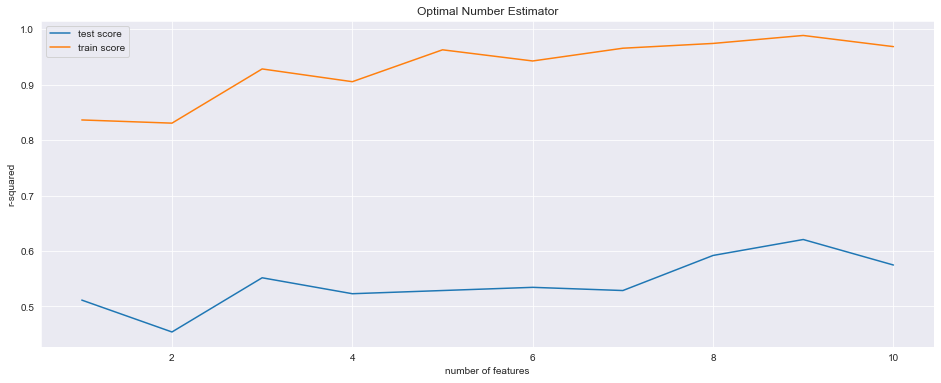

In [342]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results1["param_n_estimators"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_n_estimators"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number Estimator")
plt.legend(['test score', 'train score'], loc='upper left')

In [343]:
pprint(modelrf_cv.best_params_)

{'n_estimators': 9}


## Build Classification models

In [344]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn import metrics

#### K nearest neighbors

In [345]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(7) # Define classifier
knn.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Training set performance
knn_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
knn_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
knn_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
knn_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
knn_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
knn_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('K nearest neighbors')
print('----------------------------------')
print('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy)
print('- MCC: %s' % knn_train_mcc)
print('- F1 score: %s' % knn_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)
print('- MCC: %s' % knn_test_mcc)
print('- F1 score: %s' % knn_test_f1)
print('----------------------------------')
print('Evaluating the Algorithm')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred ))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred ))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

K nearest neighbors
----------------------------------
Model performance for Training set
- Accuracy: 0.6666666666666666
- MCC: 0.42636031866445345
- F1 score: 0.6564464316964302
----------------------------------
Model performance for Test set
- Accuracy: 0.6136363636363636
- MCC: 0.31546542357865043
- F1 score: 0.5659536541889483
----------------------------------
Evaluating the Algorithm
Mean Absolute Error: 0.38636363636363635
Mean Squared Error: 0.38636363636363635
Root Mean Squared Error: 0.621581560508061


In [346]:
print('K nearest neighbors - Parameters')
print('----------------------------------')
pprint(knn.get_params())

K nearest neighbors - Parameters
----------------------------------
{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'uniform'}


#### Decision tree

In [347]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 6) # Define classifier
dt.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Training set performance
dt_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
dt_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
dt_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
dt_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
dt_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
dt_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Decision tree')
print('----------------------------------')
print('Model performance for Training set')
print('- Accuracy: %s' % dt_train_accuracy)
print('- MCC: %s' % dt_train_mcc)
print('- F1 score: %s' % dt_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % dt_test_accuracy)
print('- MCC: %s' % dt_test_mcc)
print('- F1 score: %s' % dt_test_f1)
print('----------------------------------')
print('Evaluating the Algorithm')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred ))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred ))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Decision tree
----------------------------------
Model performance for Training set
- Accuracy: 0.8563218390804598
- MCC: 0.7566163748422178
- F1 score: 0.8539471297349891
----------------------------------
Model performance for Test set
- Accuracy: 0.5681818181818182
- MCC: 0.22380006571970318
- F1 score: 0.5350478468899522
----------------------------------
Evaluating the Algorithm
Mean Absolute Error: 0.4318181818181818
Mean Squared Error: 0.4318181818181818
Root Mean Squared Error: 0.6571287406727709


In [348]:
print('Decision tree - Parameters')
print('----------------------------------')
pprint(dt.get_params())

Decision tree - Parameters
----------------------------------
{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}


#### Random forest

In [349]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=8) # Define classifier
rf.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Random Forest')
print('----------------------------------')
print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)
print('----------------------------------')
print('Evaluating the Algorithm')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred ))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred ))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Random Forest
----------------------------------
Model performance for Training set
- Accuracy: 0.9482758620689655
- MCC: 0.9134429105237081
- F1 score: 0.9464847323130767
----------------------------------
Model performance for Test set
- Accuracy: 0.6136363636363636
- MCC: 0.31809021801274545
- F1 score: 0.5679425837320574
----------------------------------
Evaluating the Algorithm
Mean Absolute Error: 0.38636363636363635
Mean Squared Error: 0.38636363636363635
Root Mean Squared Error: 0.621581560508061


In [350]:
print('Random Forest - Parameters')
print('----------------------------------')
pprint(rf.get_params())

Random Forest - Parameters
----------------------------------
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 8,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


#### Neural network

In [351]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)

# Make predictions
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Training set performance
mlp_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
mlp_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
mlp_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
mlp_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
mlp_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
mlp_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Neural network')
print('----------------------------------')
print('Model performance for Training set')
print('- Accuracy: %s' % mlp_train_accuracy)
print('- MCC: %s' % mlp_train_mcc)
print('- F1 score: %s' % mlp_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % mlp_test_accuracy)
print('- MCC: %s' % mlp_test_mcc)
print('- F1 score: %s' % mlp_test_f1)
print('----------------------------------')
print('Evaluating the Algorithm')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred ))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred ))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Neural network
----------------------------------
Model performance for Training set
- Accuracy: 0.5574712643678161
- MCC: 0.08940122102147881
- F1 score: 0.4050453615239363
----------------------------------
Model performance for Test set
- Accuracy: 0.5454545454545454
- MCC: 0.0
- F1 score: 0.38502673796791437
----------------------------------
Evaluating the Algorithm
Mean Absolute Error: 0.5227272727272727
Mean Squared Error: 0.6590909090909091
Root Mean Squared Error: 0.8118441408859887


C:\Users\axk_l\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning:

invalid value encountered in double_scalars



In [352]:
print('Neural network - Parameters')
print('----------------------------------')
pprint(mlp.get_params())

Neural network - Parameters
----------------------------------
{'activation': 'relu',
 'alpha': 1,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}


#### Build Stacked model

In [353]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('knn',knn),
    ('dt',dt),
    ('rf',rf),
    ('mlp',mlp) ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score


print('Stacking Model')
print('----------------------------------')
print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)
print('----------------------------------')
print('Evaluating the Algorithm')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred ))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred ))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

C:\Users\axk_l\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

C:\Users\axk_l\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

C:\Users\axk_l\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

C:\Users\axk_l\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

C:\Users\axk_l\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

C:\Users\axk_l\anaconda3\lib\site-packages\sklearn\neural_network\

Stacking Model
----------------------------------
Model performance for Training set
- Accuracy: 0.8275862068965517
- MCC: 0.7030464693070354
- F1 score: 0.8148080619307003
----------------------------------
Model performance for Test set
- Accuracy: 0.6136363636363636
- MCC: 0.29689532909642175
- F1 score: 0.5264831942251296
----------------------------------
Evaluating the Algorithm
Mean Absolute Error: 0.38636363636363635
Mean Squared Error: 0.38636363636363635
Root Mean Squared Error: 0.621581560508061


C:\Users\axk_l\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



In [354]:
print('Stacking Model')
print('----------------------------------')
pprint(stack_model.get_params())

Stacking Model
----------------------------------
{'cv': None,
 'dt': DecisionTreeClassifier(max_depth=6),
 'dt__ccp_alpha': 0.0,
 'dt__class_weight': None,
 'dt__criterion': 'gini',
 'dt__max_depth': 6,
 'dt__max_features': None,
 'dt__max_leaf_nodes': None,
 'dt__min_impurity_decrease': 0.0,
 'dt__min_impurity_split': None,
 'dt__min_samples_leaf': 1,
 'dt__min_samples_split': 2,
 'dt__min_weight_fraction_leaf': 0.0,
 'dt__presort': 'deprecated',
 'dt__random_state': None,
 'dt__splitter': 'best',
 'estimators': [('knn', KNeighborsClassifier(n_neighbors=7)),
                ('dt', DecisionTreeClassifier(max_depth=6)),
                ('rf', RandomForestClassifier(n_estimators=8)),
                ('mlp', MLPClassifier(alpha=1, max_iter=1000))],
 'final_estimator': LogisticRegression(),
 'final_estimator__C': 1.0,
 'final_estimator__class_weight': None,
 'final_estimator__dual': False,
 'final_estimator__fit_intercept': True,
 'final_estimator__intercept_scaling': 1,
 'final_estimator

#### Results

In [355]:
### Results

acc_train_list = {'knn':knn_train_accuracy,
'dt': dt_train_accuracy,
'rf': rf_train_accuracy,
'nn': mlp_train_accuracy,
'stack': stack_model_train_accuracy}

mcc_train_list = {'knn':knn_train_mcc,
'dt': dt_train_mcc,
'rf': rf_train_mcc,
'nn': mlp_train_mcc,
'stack': stack_model_train_mcc}

f1_train_list = {'knn':knn_train_f1,
'dt': dt_train_f1,
'rf': rf_train_f1,
'nn': mlp_train_f1,
'stack': stack_model_train_f1}

In [356]:
pprint(acc_train_list)

{'dt': 0.8563218390804598,
 'knn': 0.6666666666666666,
 'nn': 0.5574712643678161,
 'rf': 0.9482758620689655,
 'stack': 0.8275862068965517}


In [357]:
acc_df = pd.DataFrame.from_dict(acc_train_list, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_train_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_train_list, orient='index', columns=['F1'])
df = pd.concat([acc_df, mcc_df, f1_df], axis=1)
df

,Accuracy,MCC,F1
knn,0.666667,0.426360,0.656446
dt,0.856322,0.756616,0.853947
rf,0.948276,0.913443,0.946485
nn,0.557471,0.089401,0.405045
stack,0.827586,0.703046,0.814808


In [358]:
df_acc = pd.DataFrame(acc_df)
df_acc

,Accuracy
knn,0.666667
dt,0.856322
rf,0.948276
nn,0.557471
stack,0.827586


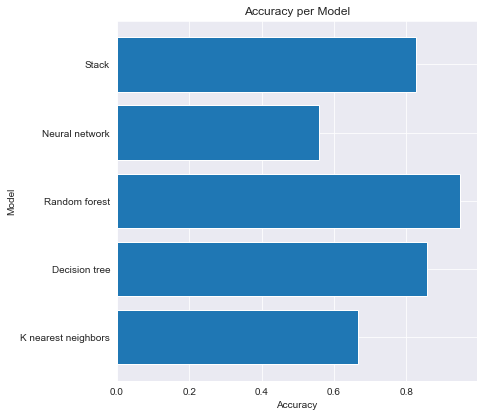

In [359]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
models = ['K nearest neighbors', 
          'Decision tree', 
          'Random forest', 
          'Neural network', 
          'Stack']
resultsm = df_acc['Accuracy']
ax.barh(models,resultsm)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy per Model')
plt.show()

In [360]:
# store resuts in a file
df.to_csv('results.csv')

### Create files and store data

In [361]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_Classifier_model.pkl', 'wb')

# Saving model to disk
# dump information to that file
pickle.dump(rf, file)
file.close()

In [362]:
# open a file, where you ant to store the data
file = open('K_nearest_Neighbors_Classifier_model.pkl', 'wb')

# Saving model to disk
# dump information to that file
pickle.dump(knn, file)
file.close()

In [363]:
# open a file, where you ant to store the data
file = open('Decision_tree_model.pkl', 'wb')

# Saving model to disk
# dump information to that file
pickle.dump(dt, file)
file.close()

In [364]:
# open a file, where you ant to store the data
file = open('Neural_network_model.pkl', 'wb')

# Saving model to disk
# dump information to that file
pickle.dump(mlp, file)
file.close()

In [365]:
# open a file, where you ant to store the data
file = open('Stack_model.pkl', 'wb')

# Saving model to disk
# dump information to that file
pickle.dump(stack_model, file)
file.close()

In [366]:
dataset_sel.tail(10)

,Q10_1,Q10_4,Q10_5,Q10_6,Q10_7,Q10_9,Q10_12,Q17_1,Q17_7,Q17_10,Q9
208,4,4,4,3,3,3,2,4,4,4,4
209,3,4,4,1,1,4,4,5,5,5,4
210,3,3,3,3,3,4,3,4,3,5,4
211,4,5,4,4,3,3,2,3,2,5,4
212,3,2,4,1,3,1,3,3,4,3,2
213,4,5,4,3,4,4,4,3,4,4,5
214,3,2,3,2,3,2,2,3,2,2,2
215,3,3,3,1,1,2,2,3,5,4,3
216,5,4,3,3,3,4,3,3,3,4,4
217,3,4,2,2,3,3,2,4,5,3,4


### Loading model to compare the results

In [367]:
# model Random forest

model_rf = pickle.load(open('random_forest_Classifier_model.pkl','rb'))
model_knn = pickle.load(open('K_nearest_Neighbors_Classifier_model.pkl','rb'))
model_dt = pickle.load(open('Decision_tree_model.pkl','rb'))
model_mlp = pickle.load(open('Neural_network_model.pkl','rb'))
model_stack = pickle.load(open('Stack_model.pkl','rb'))

In [368]:
print(model_rf)
print(model_knn)
print(model_dt)
print(model_mlp)
print(model_stack)

RandomForestClassifier(n_estimators=8)
KNeighborsClassifier(n_neighbors=7)
DecisionTreeClassifier(max_depth=6)
MLPClassifier(alpha=1, max_iter=1000)
StackingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=7)),
                               ('dt', DecisionTreeClassifier(max_depth=6)),
                               ('rf', RandomForestClassifier(n_estimators=8)),
                               ('mlp', MLPClassifier(alpha=1, max_iter=1000))],
                   final_estimator=LogisticRegression())


In [369]:
print('Random forest: %s' % model_rf.predict([[1,1,1,1,1,1,1,1,1,1]]))
print('K nearest neighbors: %s' % model_knn.predict([[1,1,1,1,1,1,1,1,1,1]]))
print('Decision tree: %s' % model_dt.predict([[1,1,1,1,1,1,1,1,1,1]]))
print('Neural network: %s' %model_mlp.predict([[1,1,1,1,1,1,1,1,1,1]]))
print('Stack: %s' %model_stack.predict([[1,1,1,1,1,1,1,1,1,1]]))

#3,2,3,2,3,2,2,3,2,2


Random forest: [3]
K nearest neighbors: [3]
Decision tree: [3]
Neural network: [4]
Stack: [3]


In [370]:
print('Random forest: %s' % model_rf.predict([[3,2,3,2,3,2,2,3,2,2]]))
print('K nearest neighbors: %s' % model_knn.predict([[3,2,3,2,3,2,2,3,2,2]]))
print('Decision tree: %s' % model_dt.predict([[3,2,3,2,3,2,2,3,2,2]]))
print('Neural network: %s' %model_mlp.predict([[3,2,3,2,3,2,2,3,2,2]]))
print('Stack: %s' %model_stack.predict([[3,2,3,2,3,2,2,3,2,2]]))

Random forest: [2]
K nearest neighbors: [3]
Decision tree: [2]
Neural network: [4]
Stack: [3]
